### 날짜별 분석

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
from PIL import Image

In [46]:
plt.rcParams['font.family']='HYGPRM'

In [47]:
df1=pd.read_csv("MetroData/2201.csv")
df2=pd.read_csv("MetroData/2202.csv")
df3=pd.read_csv("MetroData/2203.csv")
df4=pd.read_csv("MetroData/2204.csv")
df5=pd.read_csv("MetroData/2205.csv")
df6=pd.read_csv("MetroData/2206.csv")
df7=pd.read_csv("MetroData/2207.csv")
df8=pd.read_csv("MetroData/2208.csv")
df9=pd.read_csv("MetroData/2022.csv")

In [48]:
df9.월.unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [49]:
df9.일.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

### 2022년 1~8월까지의 데이터라는 것을 알 수 있다

### 월별 승객 데이터

In [50]:
df9[["월", "승차승객", "하차승객", "총 승객"]].groupby(["월"]).mean()

,승차승객,하차승객,총 승객
월,,,
1,9060.095135,9028.133794,18088.228929
2,8517.294818,8489.189983,17006.484801
3,8851.885688,8822.759463,17674.645151
4,10321.086737,10282.937132,20604.023870
5,10997.577801,10961.165117,21958.742917
6,10529.076407,10490.024974,21019.101381
7,10301.967110,10263.144119,20565.111229
8,9926.206474,9889.340113,19815.546587


In [51]:
df9[["월", "승차승객", "하차승객", "총 승객"]].groupby(["월"]).sum()

,승차승객,하차승객,총 승객
월,,,
1,167802022,167210066,335012088
2,142341031,141871343,284212374
3,163467773,162929899,326397672
4,184200435,183519579,367720014
5,203411199,202737710,406148909
6,191408080,190698164,382106244
7,193573962,192844478,386418440
8,186434010,185741586,372175596


### 많은 순 정렬

In [52]:
df9[["월", "승차승객", "하차승객", "총 승객"]].groupby(["월"]).mean().sort_values(by="총 승객", ascending=False)

,승차승객,하차승객,총 승객
월,,,
5,10997.577801,10961.165117,21958.742917
6,10529.076407,10490.024974,21019.101381
4,10321.086737,10282.937132,20604.023870
7,10301.967110,10263.144119,20565.111229
8,9926.206474,9889.340113,19815.546587
1,9060.095135,9028.133794,18088.228929
3,8851.885688,8822.759463,17674.645151
2,8517.294818,8489.189983,17006.484801


In [53]:
df9[["월", "승차승객", "하차승객", "총 승객"]].groupby(["월"]).sum().sort_values(by="총 승객", ascending=False)

,승차승객,하차승객,총 승객
월,,,
5,203411199,202737710,406148909
7,193573962,192844478,386418440
6,191408080,190698164,382106244
8,186434010,185741586,372175596
4,184200435,183519579,367720014
1,167802022,167210066,335012088
3,163467773,162929899,326397672
2,142341031,141871343,284212374


### 결과확인
#### 총 승객 평균 정보
 - 5월이 가장 많고, 2월이 가장 적다
#### 총 승객 합 정보
 - 5월이 가장 많고, 2월이 가장 적다
#### 분석
 - 상대적으로 춥고, 더운 겨울과 여름보다 봄에 승객이 많다
 - 한 달의 기간이 긴 5월과 7월, 8월의 승객 수가 높다
 - 1월은 겨울이라는 점과 설연휴가 있다는 점이 영향을 끼쳤을 것이다
 - 2월은 28일까지라는 점이 승객의 수에 영향을 끼쳤을 것이다
 - 2월과 3월이 적은 것은 코로나 확진자 수가 많이 나왔던 기간과 겹친다

### 일별 승객 데이터

In [54]:
df9[["일", "승차승객", "하차승객", "총 승객"]].groupby(["일"]).mean()

,승차승객,하차승객,총 승객
일,,,
1,7654.610474,7621.399124,15276.009597
2,8901.124844,8868.698624,17769.823468
3,9728.487602,9694.476766,19422.964368
4,10805.513322,10769.104913,21574.618235
5,9085.288991,9046.123436,18131.412427
6,8644.205919,8611.153397,17255.359316
7,10070.047460,10032.953164,20103.000624
8,10142.739221,10109.060821,20251.800042
9,9147.756982,9113.840559,18261.597541


In [55]:
df9[["일", "승차승객", "하차승객", "총 승객"]].groupby(["일"]).sum()

,승차승객,하차승객,총 승객
일,,,
1,36688548,36529366,73217914
2,42707597,42552016,85259613
3,46687012,46523794,93210806
4,51909686,51734780,103644466
5,43573046,43385208,86958254
6,41474900,41316314,82791214
7,48376508,48198307,96574815
8,48695291,48533601,97228892
9,43890938,43728207,87619145


### 많은 순으로 정렬

In [56]:
df9[["일", "승차승객", "하차승객", "총 승객"]].groupby(["일"]).mean().sort_values(by="총 승객", ascending=False)

,승차승객,하차승객,총 승객
일,,,
25,10983.816458,10948.149375,21931.965833
11,10869.529694,10835.478850,21705.008543
18,10862.120000,10827.255417,21689.375417
4,10805.513322,10769.104913,21574.618235
21,10316.330623,10280.807171,20597.137794
22,10279.676747,10243.550365,20523.227112
14,10258.160266,10223.784513,20481.944779
28,10258.911153,10221.908448,20480.819600
8,10142.739221,10109.060821,20251.800042


In [57]:
df9[["일", "승차승객", "하차승객", "총 승객"]].groupby(["일"]).sum().sort_values(by="총 승객", ascending=False)

,승차승객,하차승객,총 승객
일,,,
25,52722319,52551117,105273436
11,52162873,51999463,104162336
18,52138176,51970826,104109002
4,51909686,51734780,103644466
21,49487438,49317032,98804470
14,49413558,49247970,98661528
28,49304327,49126492,98430819
22,49291050,49117824,98408874
8,48695291,48533601,97228892


### 결과확인
#### 총 승객 평균 정보
 - 25일이 가장 많고, 1일이 가장 적다
#### 총 승객 합 정보
 - 25일이 가장 많고, 31일이 가장 적다
#### 분석
 - 29일, 30일, 31일이 적은 것은 29일과 30일, 31일이 없는 달이 있어서다
 - 휴일이 많은 날일수록 승객 수가 적다
 - 매월 주중에 포함되는 날이 많을수록 승객 수가 많다
 - 1일은 신정과 설연휴, 3.1절, 지방선거 등의 휴무일이 많아서 승객 수가 적다

### 월별 그래프

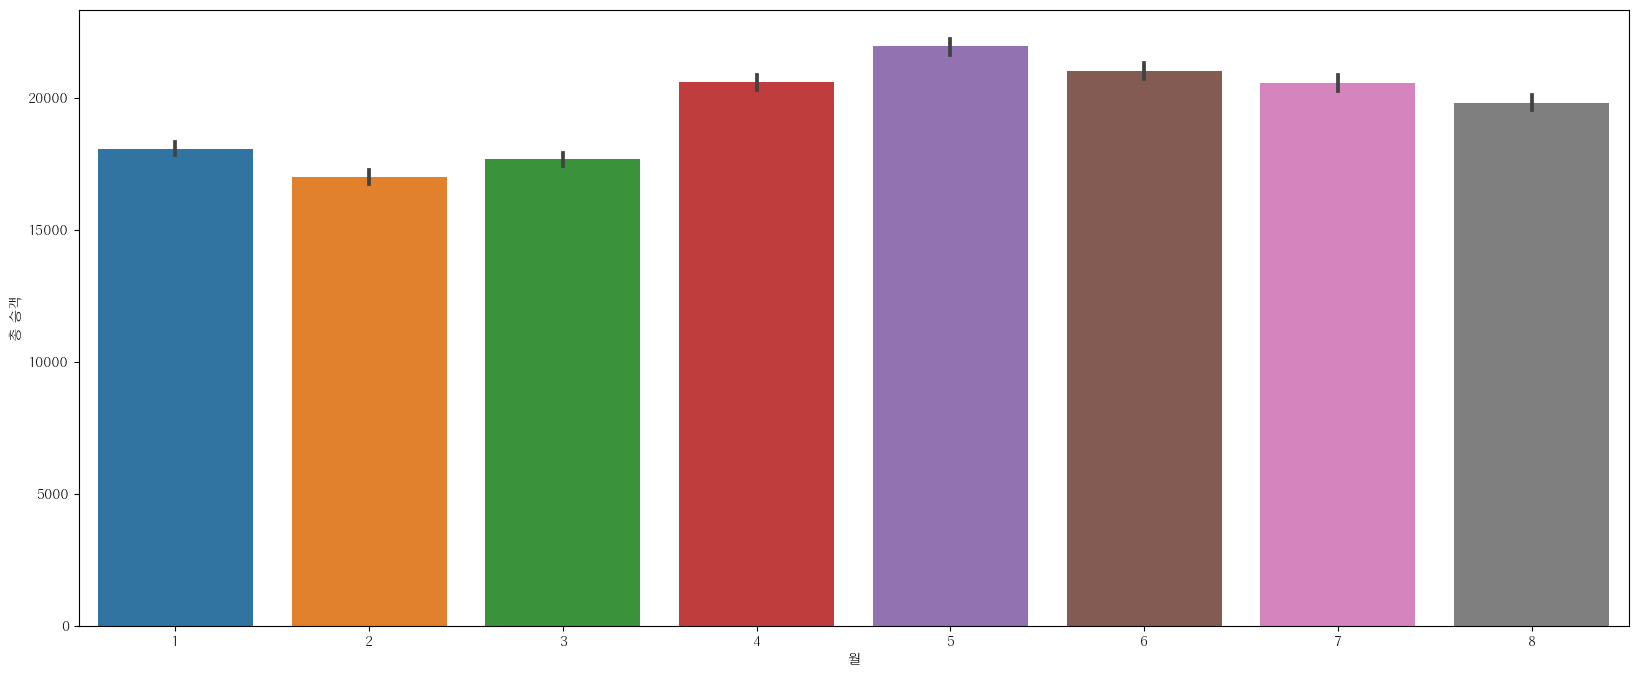

In [58]:
plt.subplots(figsize=(20, 8))
sns.barplot(data=df9, x="월", y="총 승객")
plt.show()

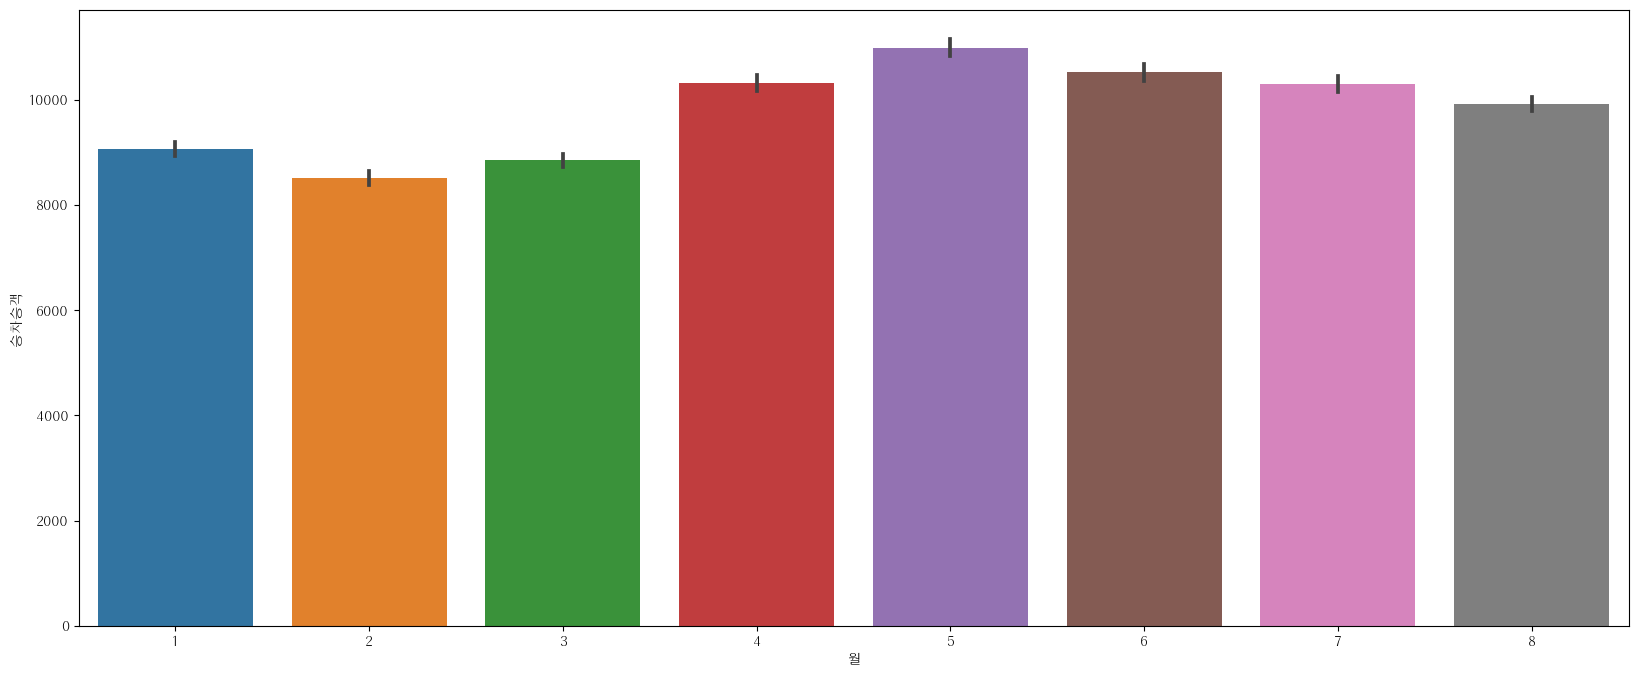

In [59]:
plt.subplots(figsize=(20, 8))
sns.barplot(data=df9, x="월", y="승차승객")
plt.show()

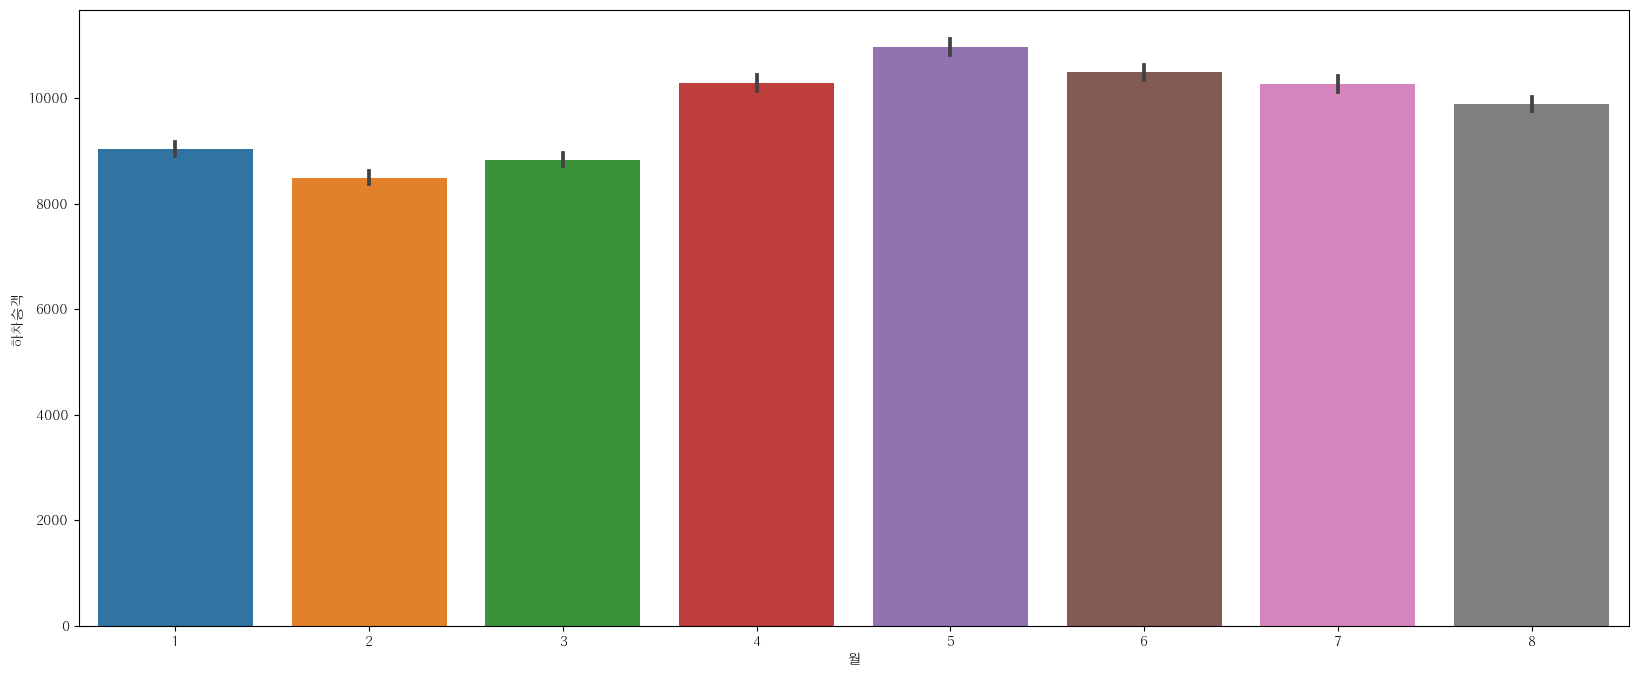

In [60]:
plt.subplots(figsize=(20, 8))
sns.barplot(data=df9, x="월", y="하차승객")
plt.show()

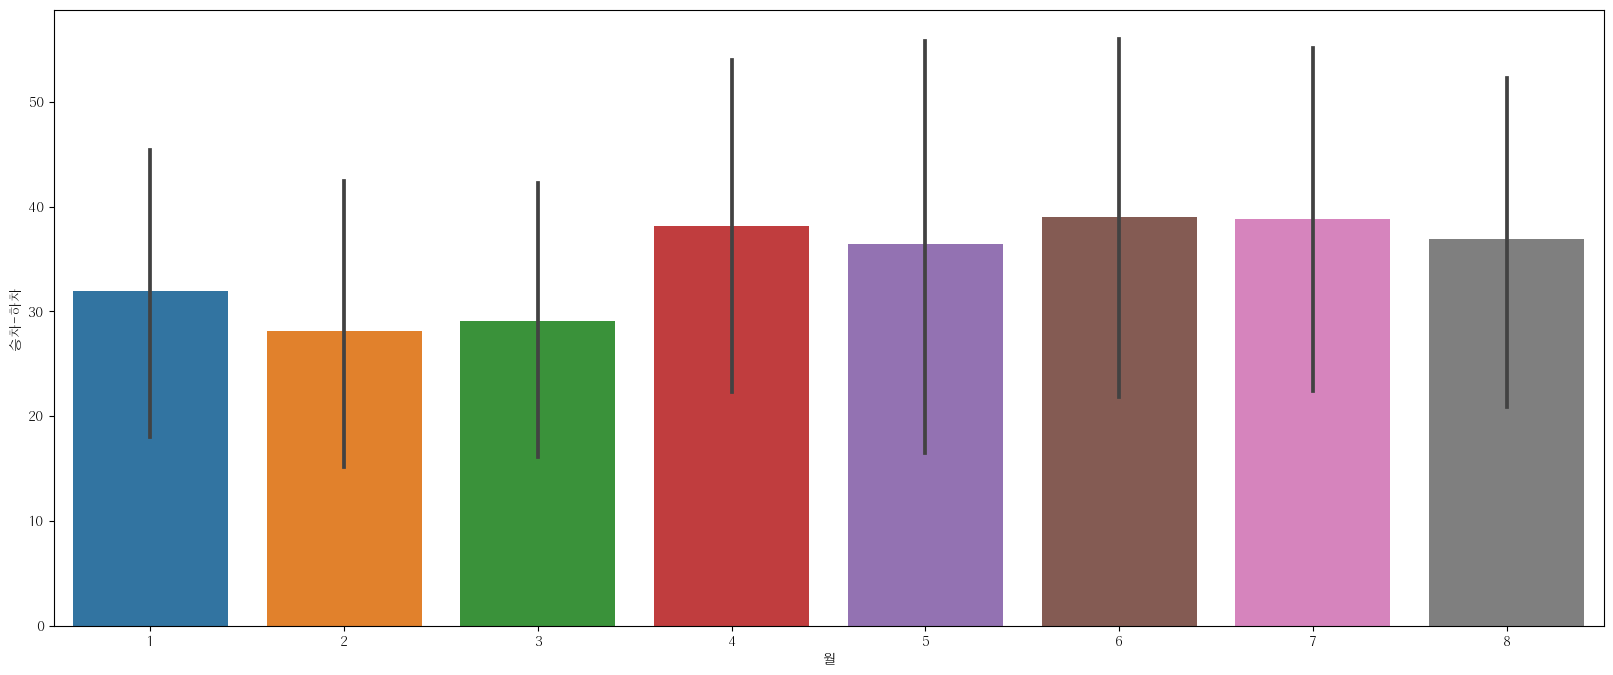

In [61]:
plt.subplots(figsize=(20, 8))
sns.barplot(data=df9, x="월", y="승차-하차")
plt.show()

### 일별 그래프

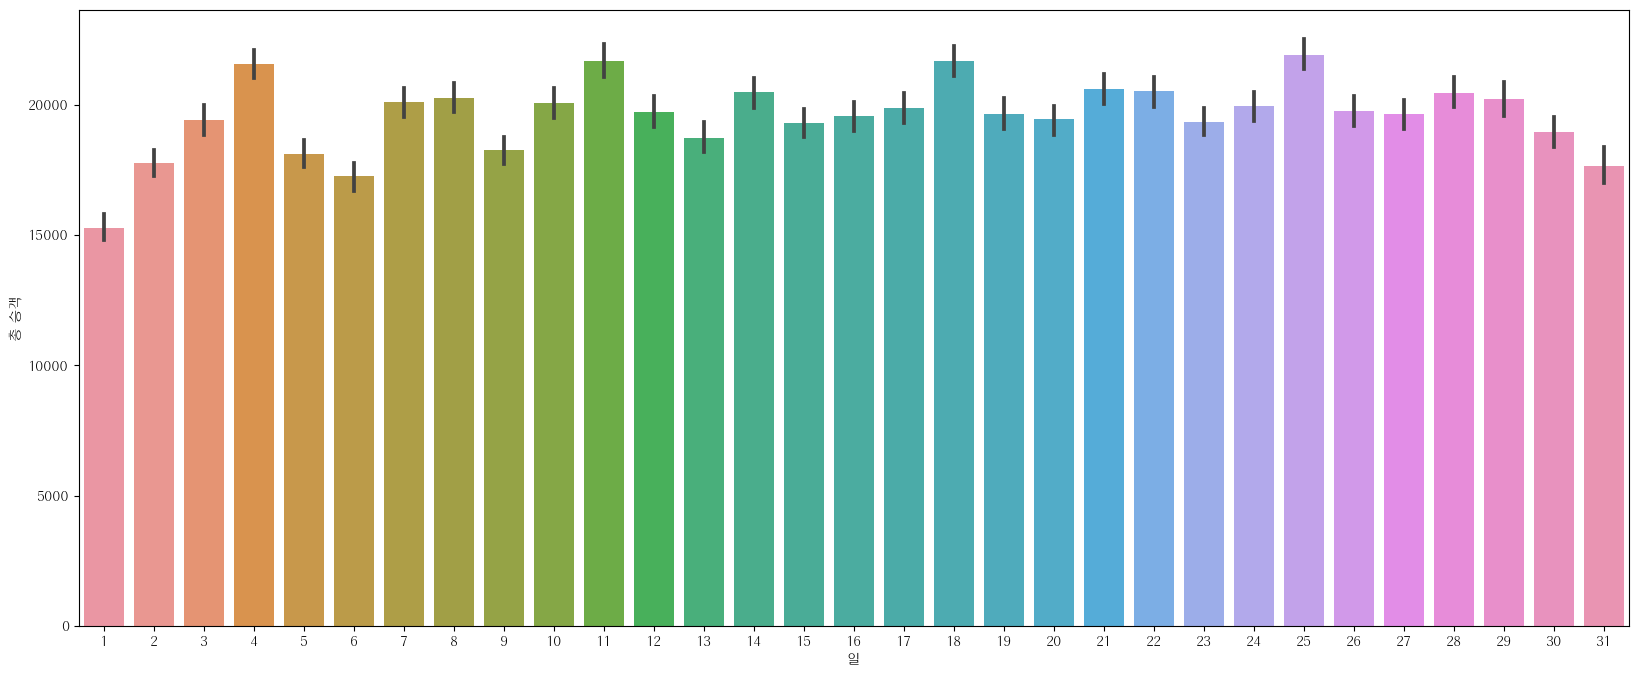

In [62]:
plt.subplots(figsize=(20, 8))
sns.barplot(data=df9, x="일", y="총 승객")
plt.show()

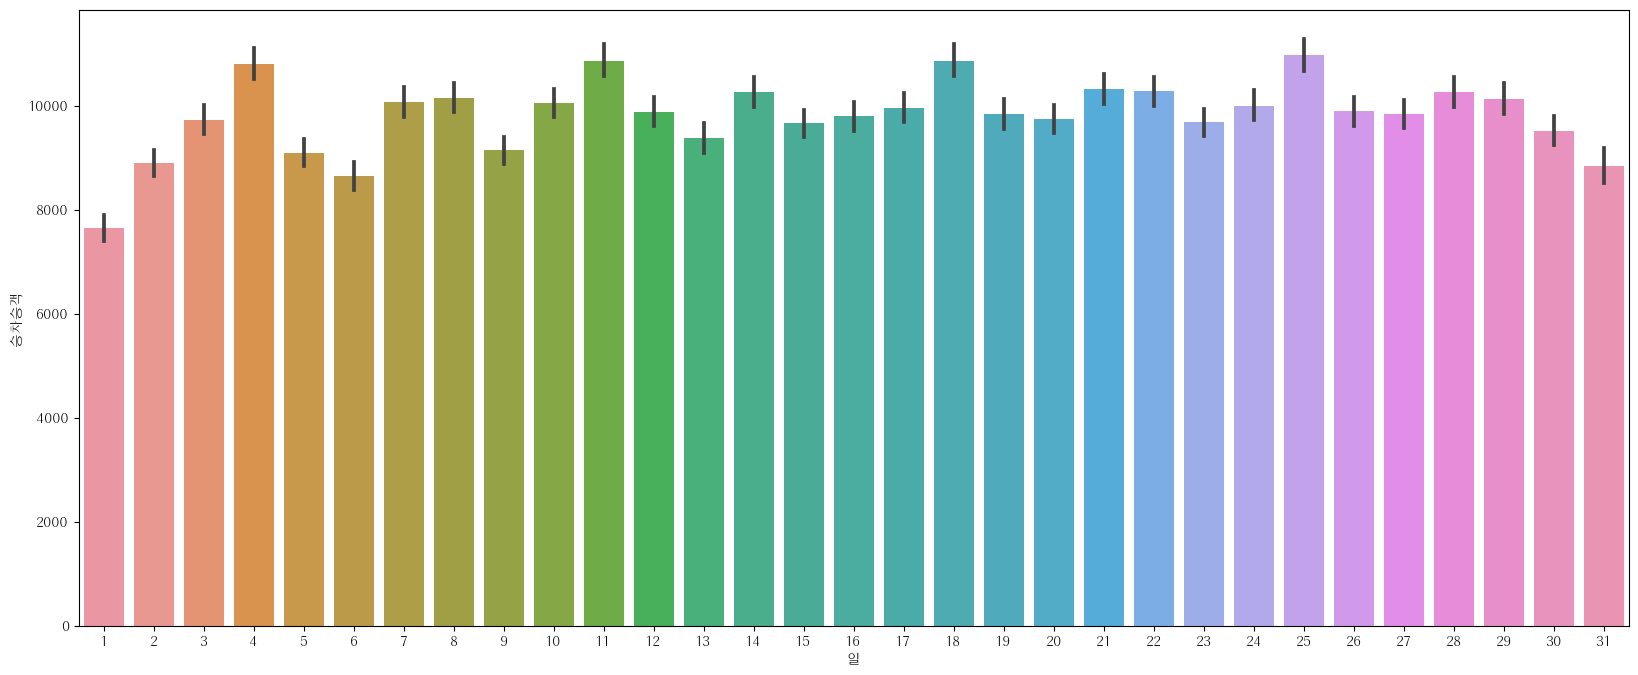

In [63]:
plt.subplots(figsize=(20, 8))
sns.barplot(data=df9, x="일", y="승차승객")
plt.show()

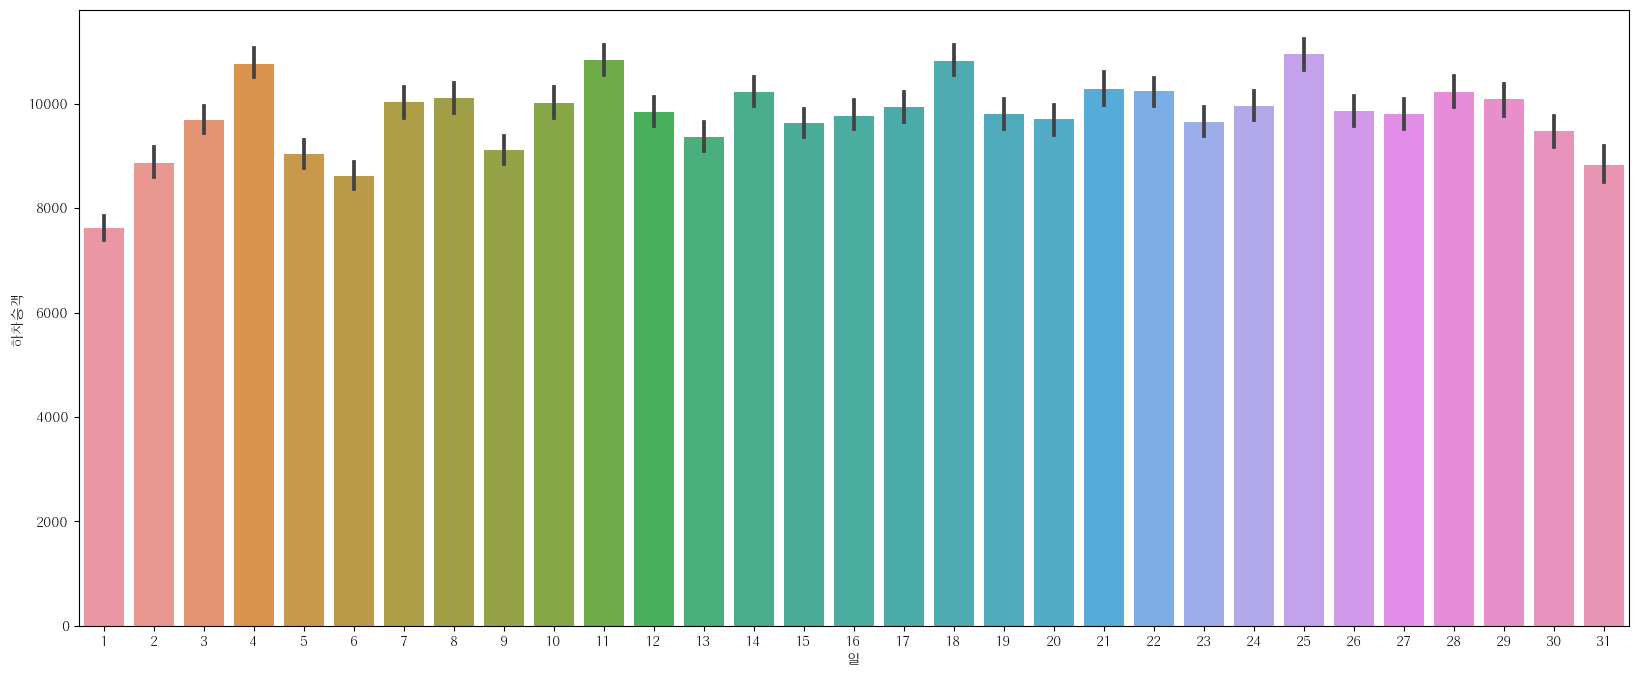

In [64]:
plt.subplots(figsize=(20, 8))
sns.barplot(data=df9, x="일", y="하차승객")
plt.show()

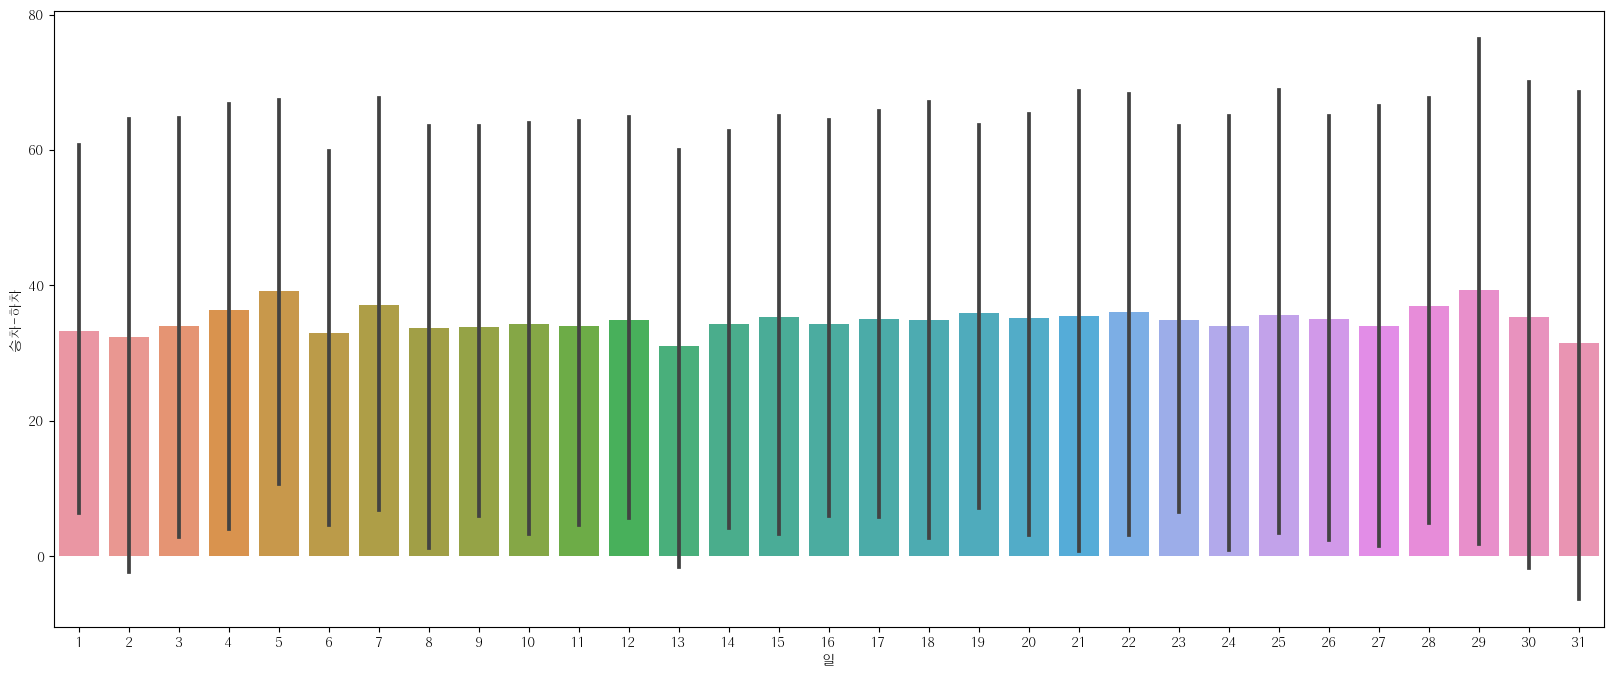

In [65]:
plt.subplots(figsize=(20, 8))
sns.barplot(data=df9, x="일", y="승차-하차")
plt.show()

In [66]:
df9.월.value_counts().sort_values(ascending=False)

7    18790
8    18782
1    18521
5    18496
3    18467
6    18179
4    17847
2    16712
Name: 월, dtype: int64

### 월 카운트
 - 빈도는 31일까지인 달이 많지만, 일수보다 다른 요인이 승객 수에 더 영향을 끼친다
 - 승객 수 상위인 달은 계절의 영향이 있을 것이다

In [67]:
df9.일.value_counts().sort_values(ascending=False)

14    4817
28    4806
4     4804
23    4804
7     4804
8     4801
25    4800
18    4800
20    4799
19    4799
17    4799
16    4799
11    4799
3     4799
6     4798
24    4798
9     4798
2     4798
21    4797
12    4796
27    4796
10    4796
5     4796
15    4795
22    4795
26    4795
1     4793
13    4792
29    4211
30    4201
31    3009
Name: 일, dtype: int64

### 월별 승객 그래프

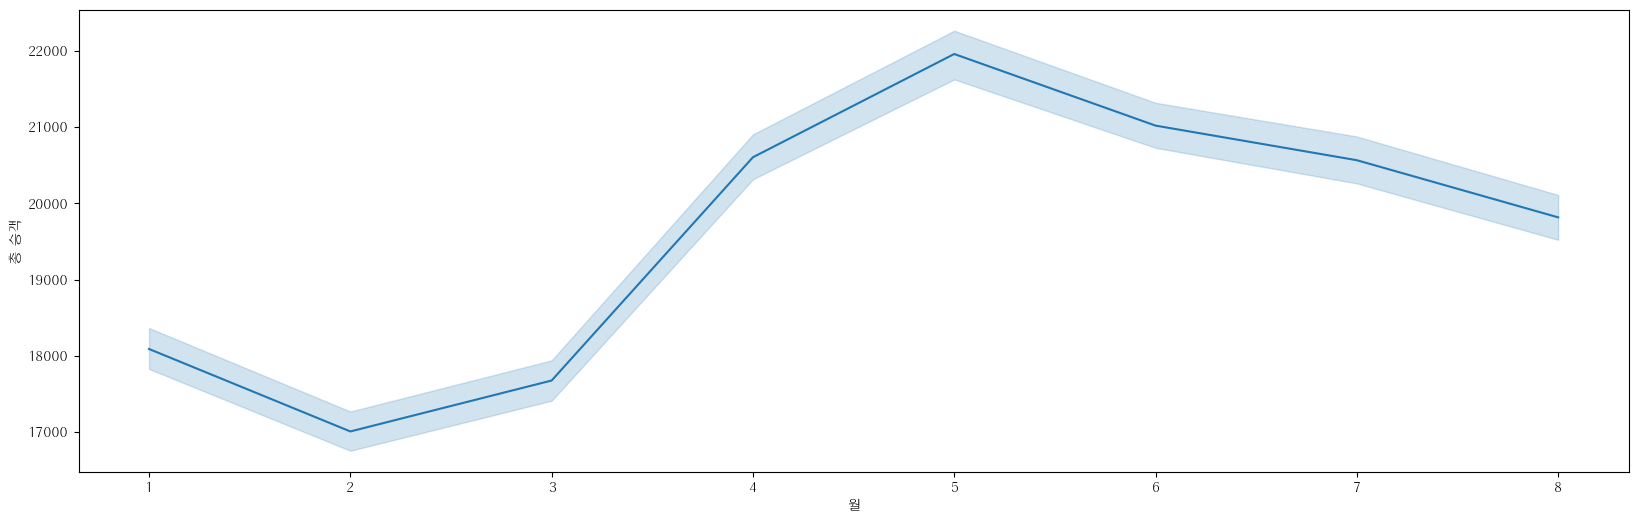

In [68]:
plt.subplots(figsize=(20, 6))
sns.lineplot(data=df9, x="월", y="총 승객")
plt.show()

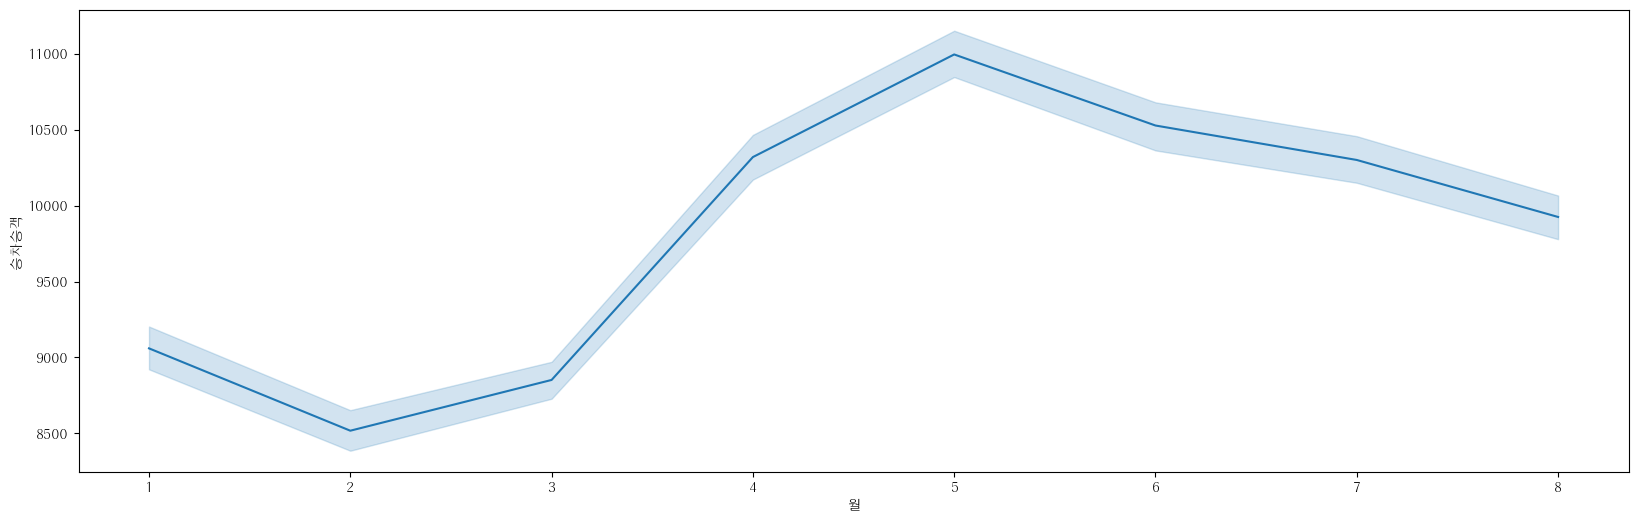

In [69]:
plt.subplots(figsize=(20, 6))
sns.lineplot(data=df9, x="월", y="승차승객")
plt.show()

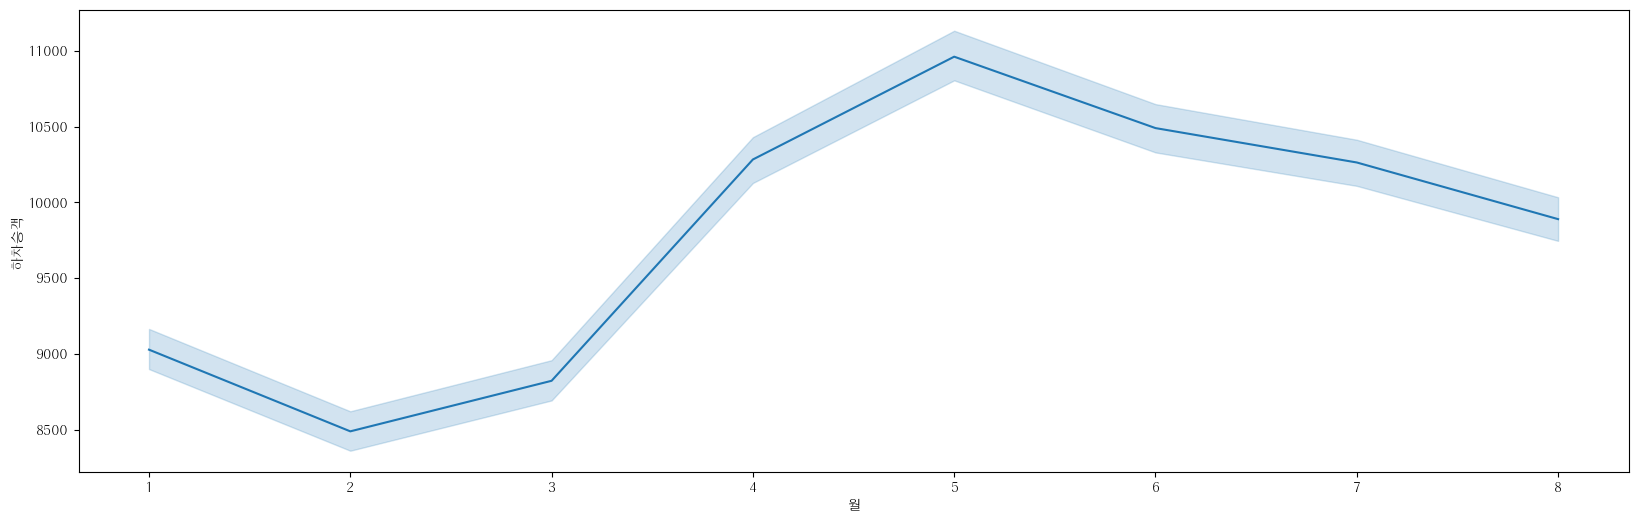

In [70]:
plt.subplots(figsize=(20, 6))
sns.lineplot(data=df9, x="월", y="하차승객")
plt.show()

### 일별 승객그래프

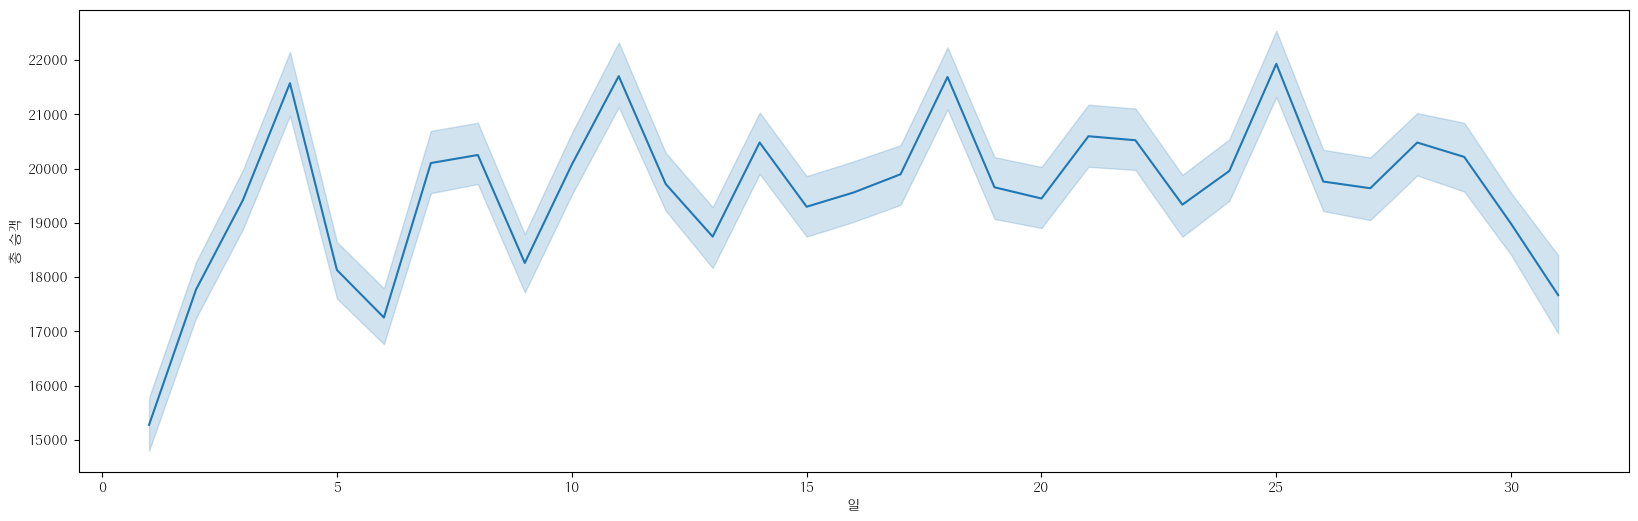

In [71]:
plt.subplots(figsize=(20, 6))
sns.lineplot(data=df9, x="일", y="총 승객")
plt.show()

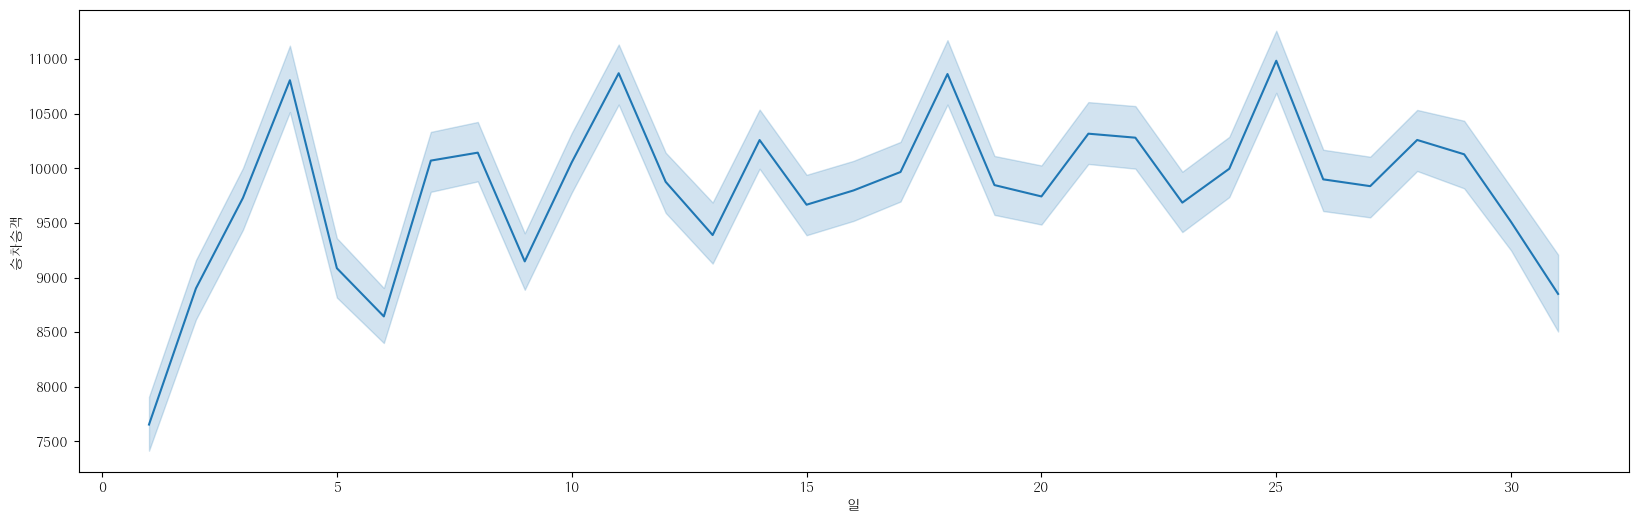

In [72]:
plt.subplots(figsize=(20, 6))
sns.lineplot(data=df9, x="일", y="승차승객")
plt.show()

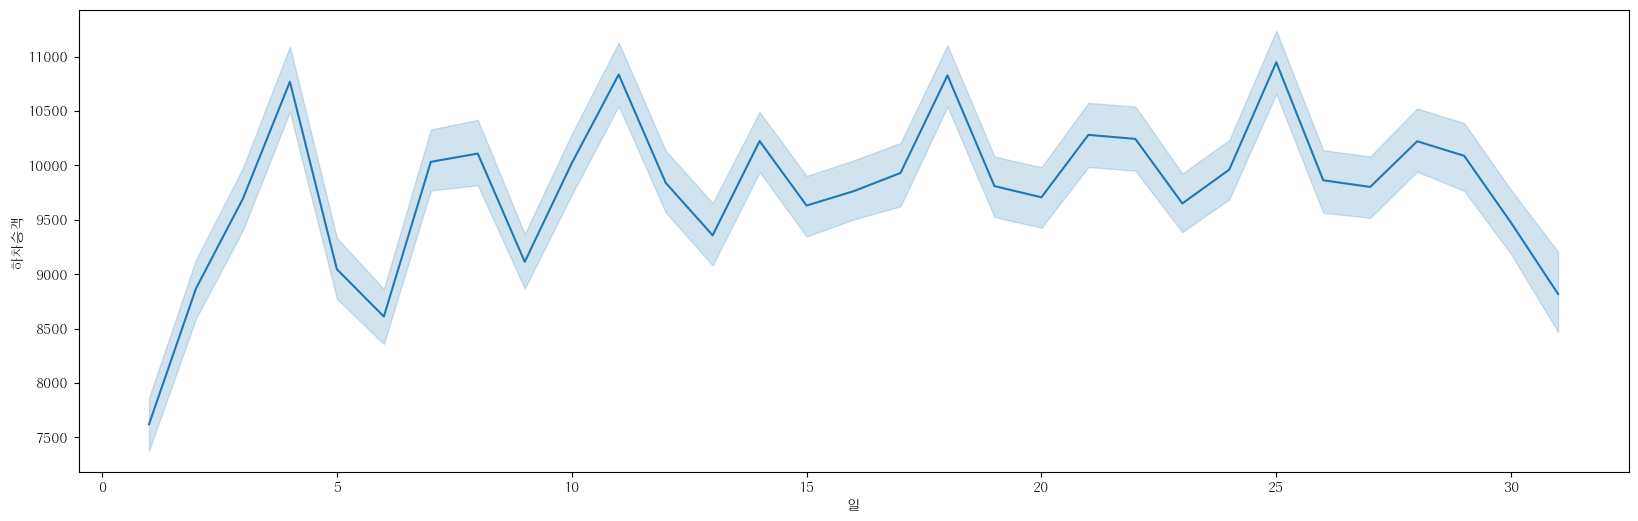

In [73]:
plt.subplots(figsize=(20, 6))
sns.lineplot(data=df9, x="일", y="하차승객")
plt.show()

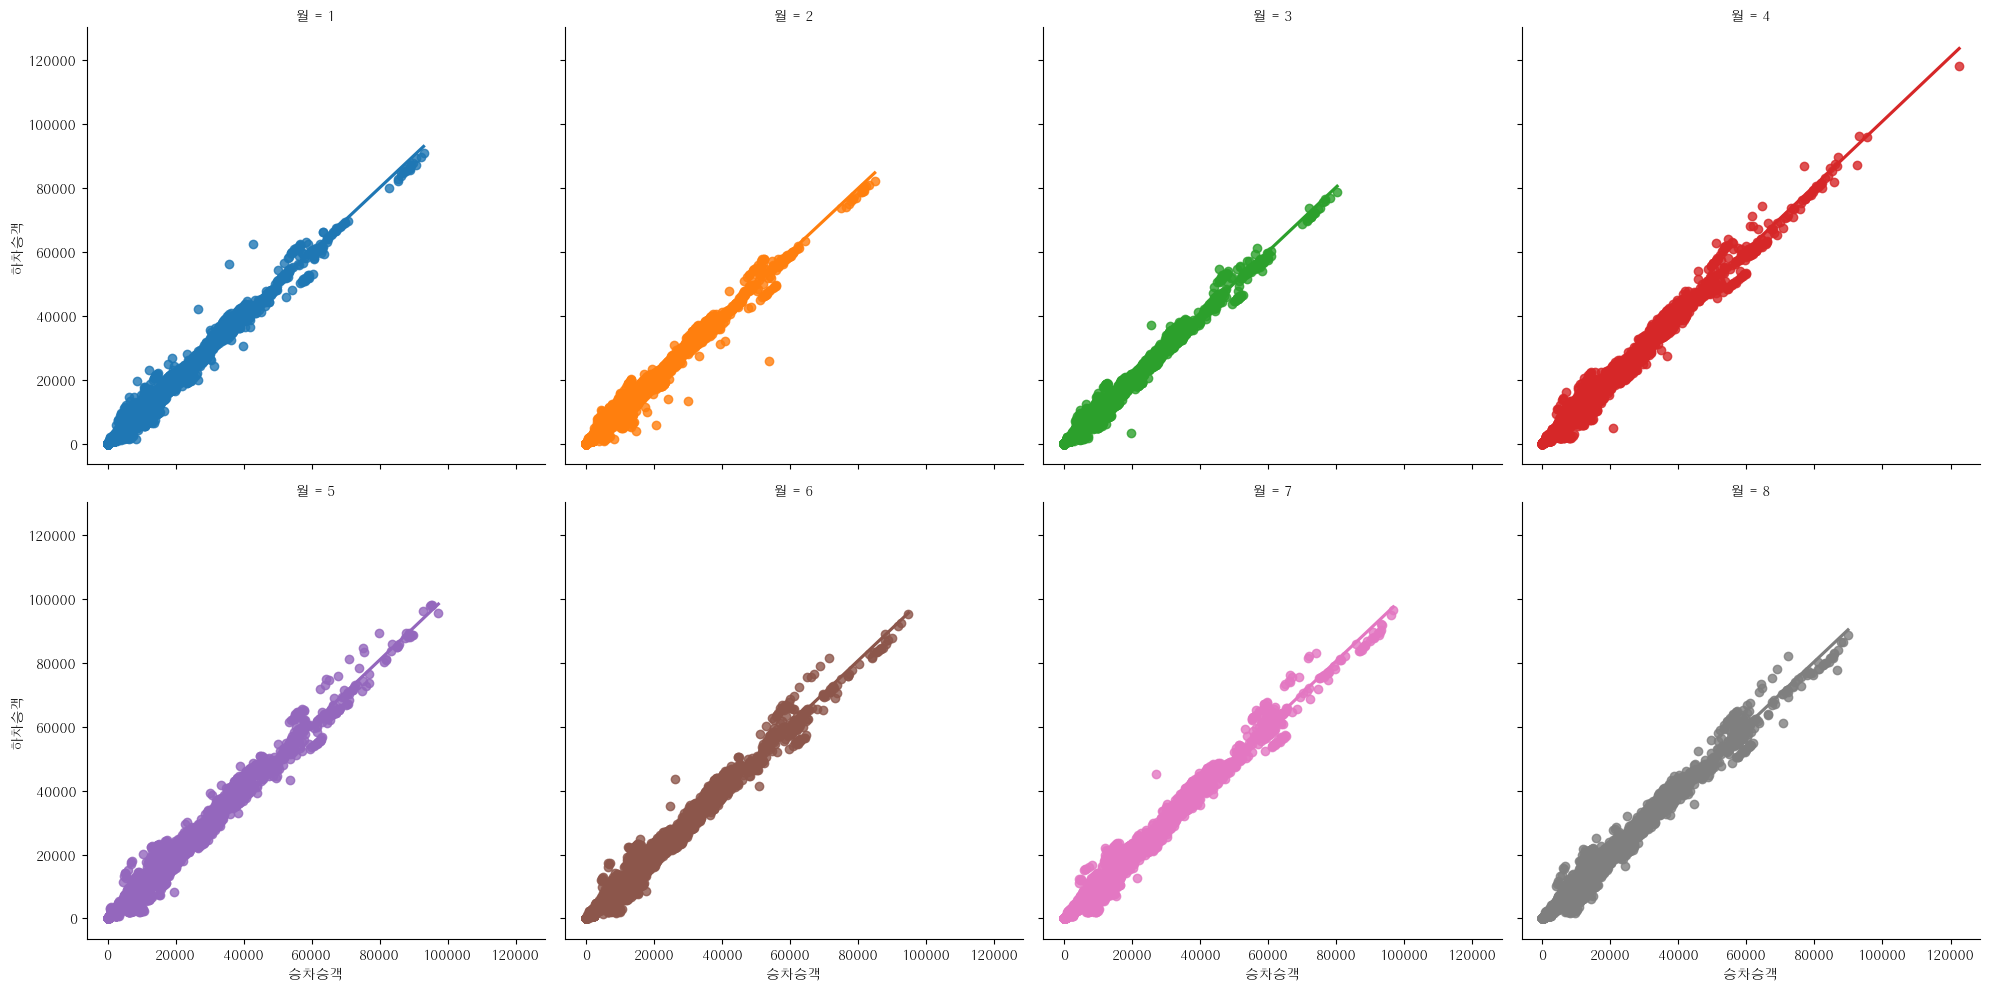

In [74]:
sns.lmplot(data=df9, x="승차승객", y="하차승객", hue="월", col="월", col_wrap=4)

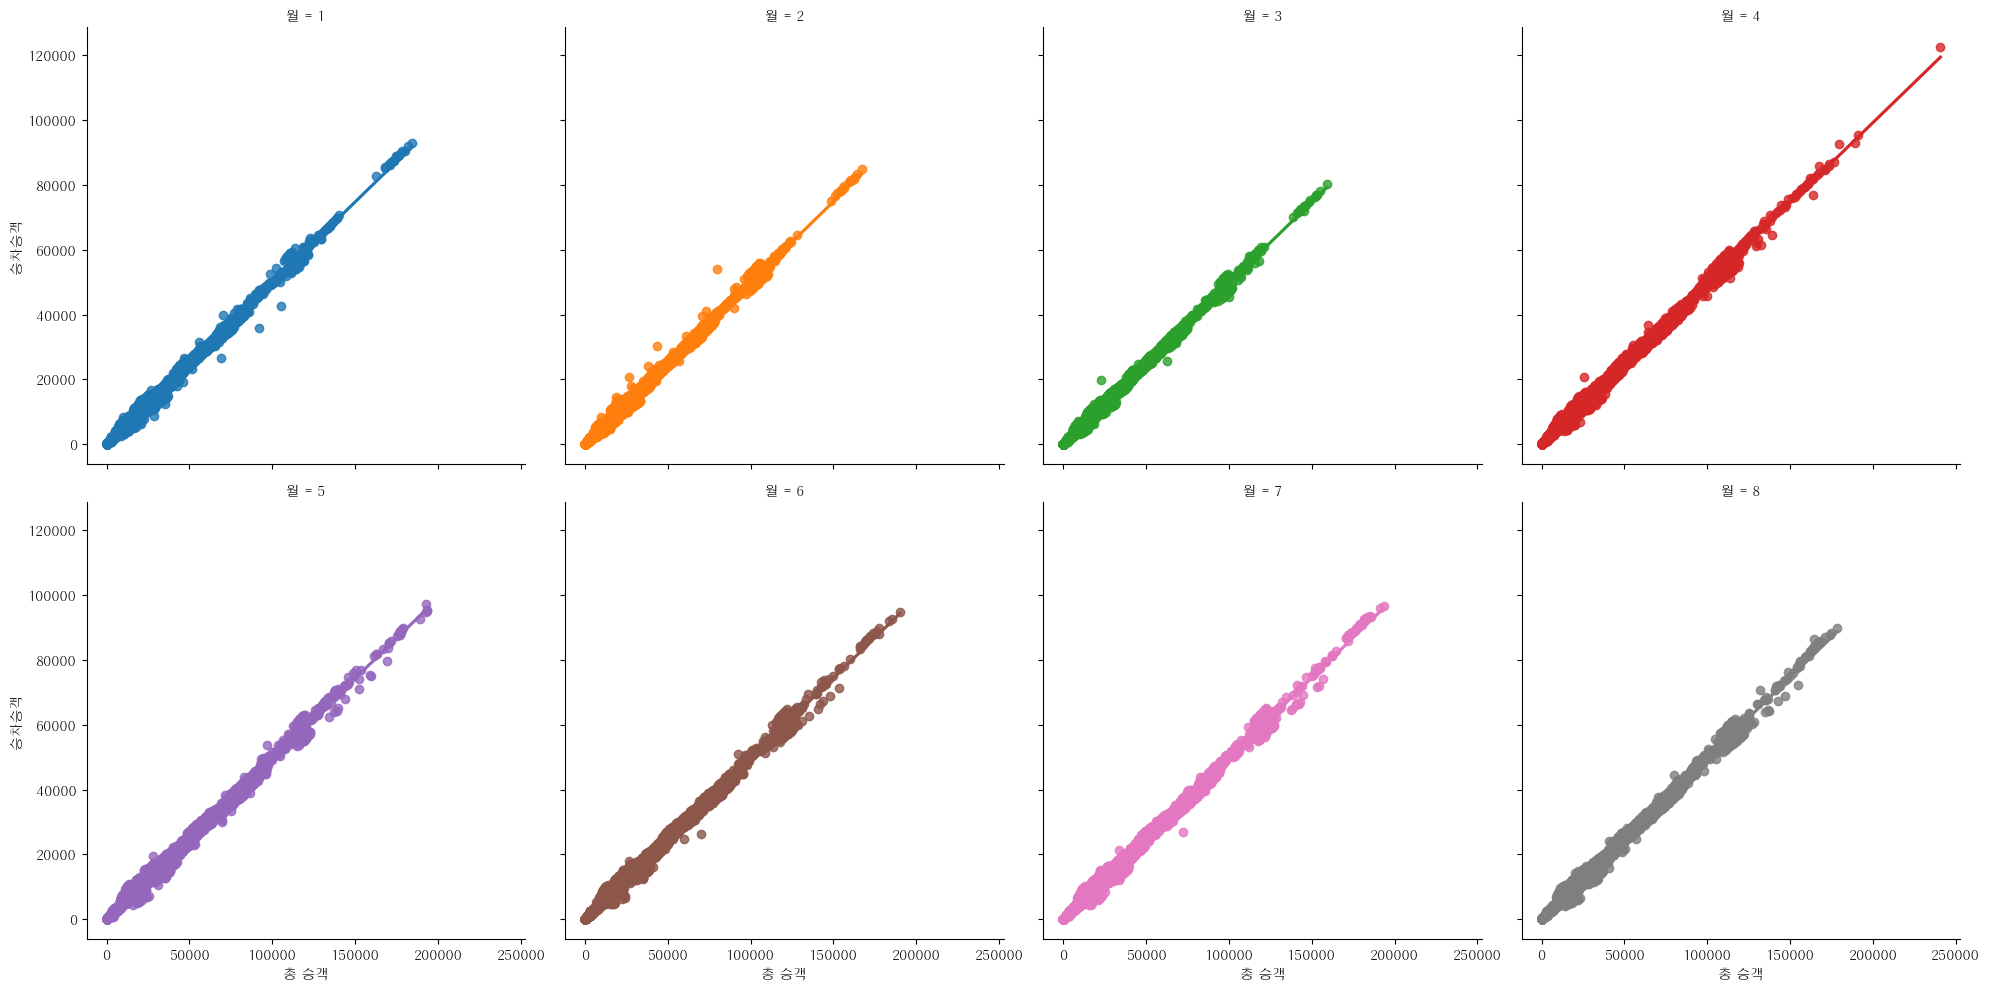

In [75]:
sns.lmplot(data=df9, x="총 승객", y="승차승객", hue="월", col="월", col_wrap=4)

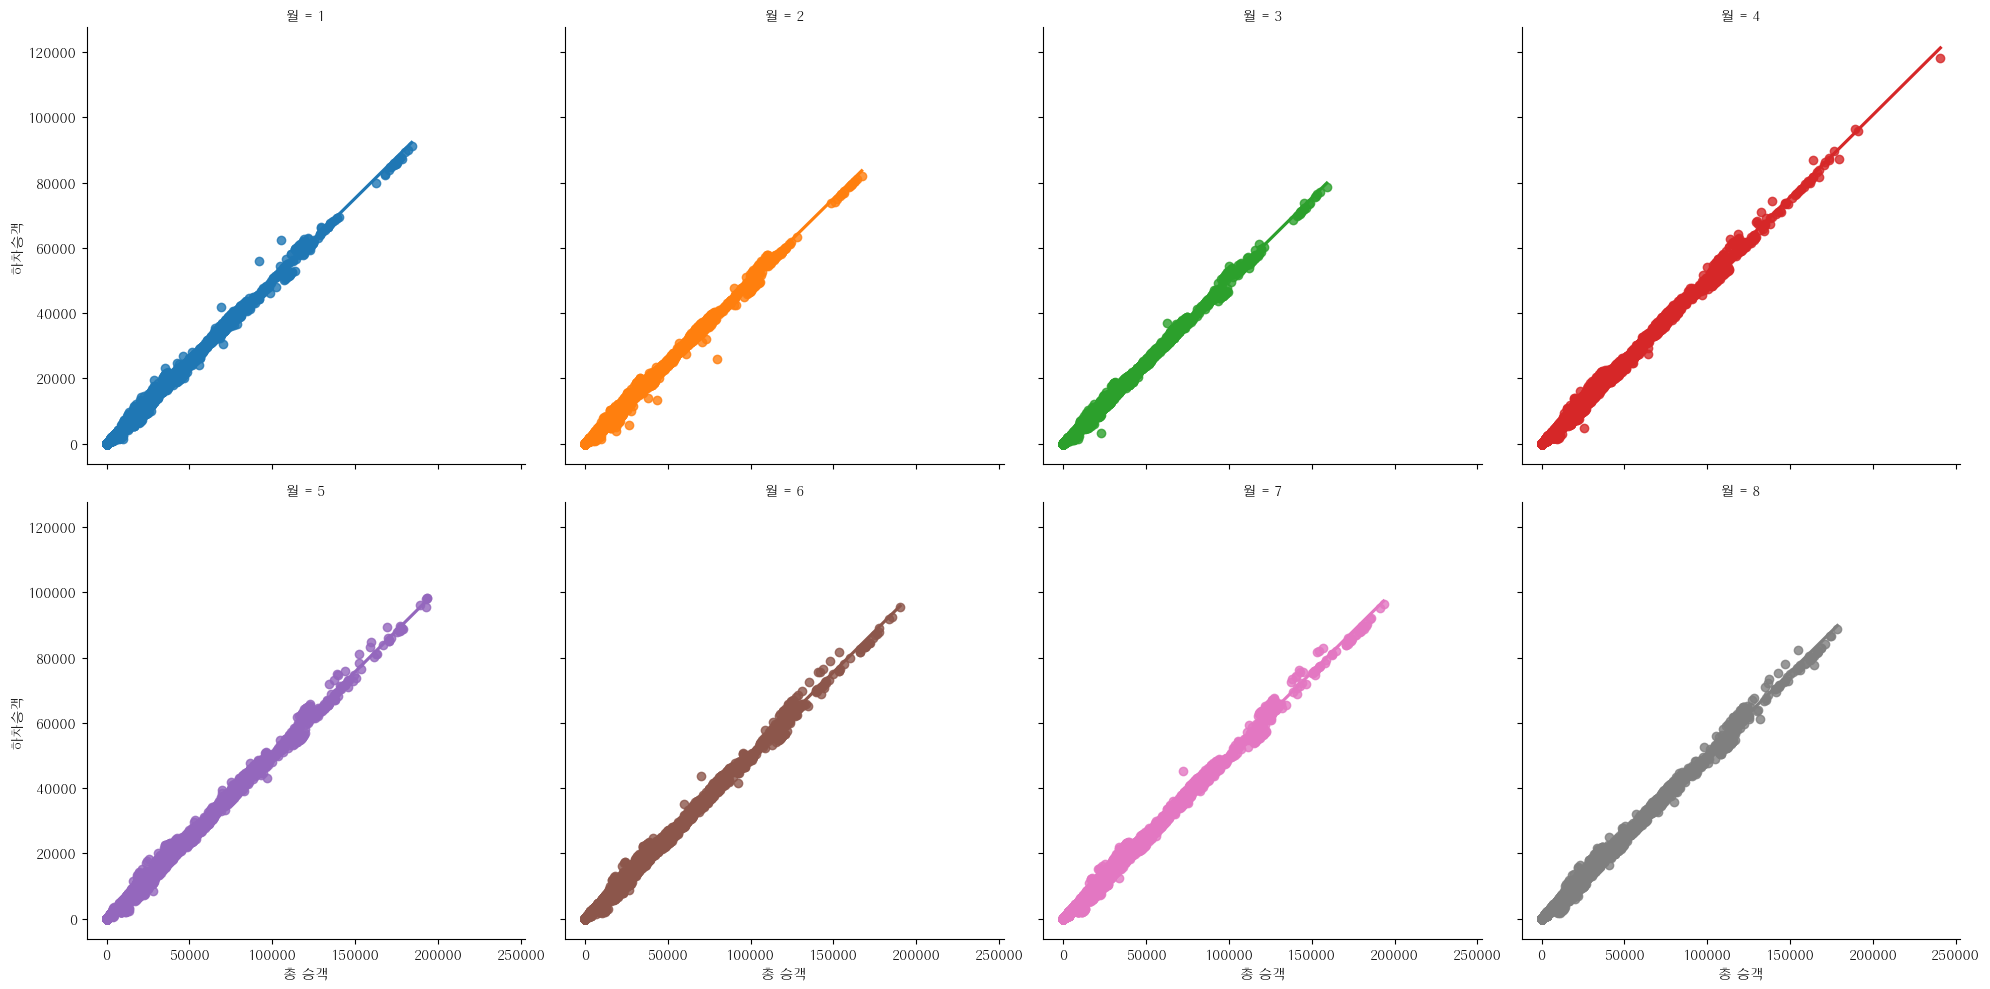

In [76]:
sns.lmplot(data=df9, x="총 승객", y="하차승객", hue="월", col="월", col_wrap=4)

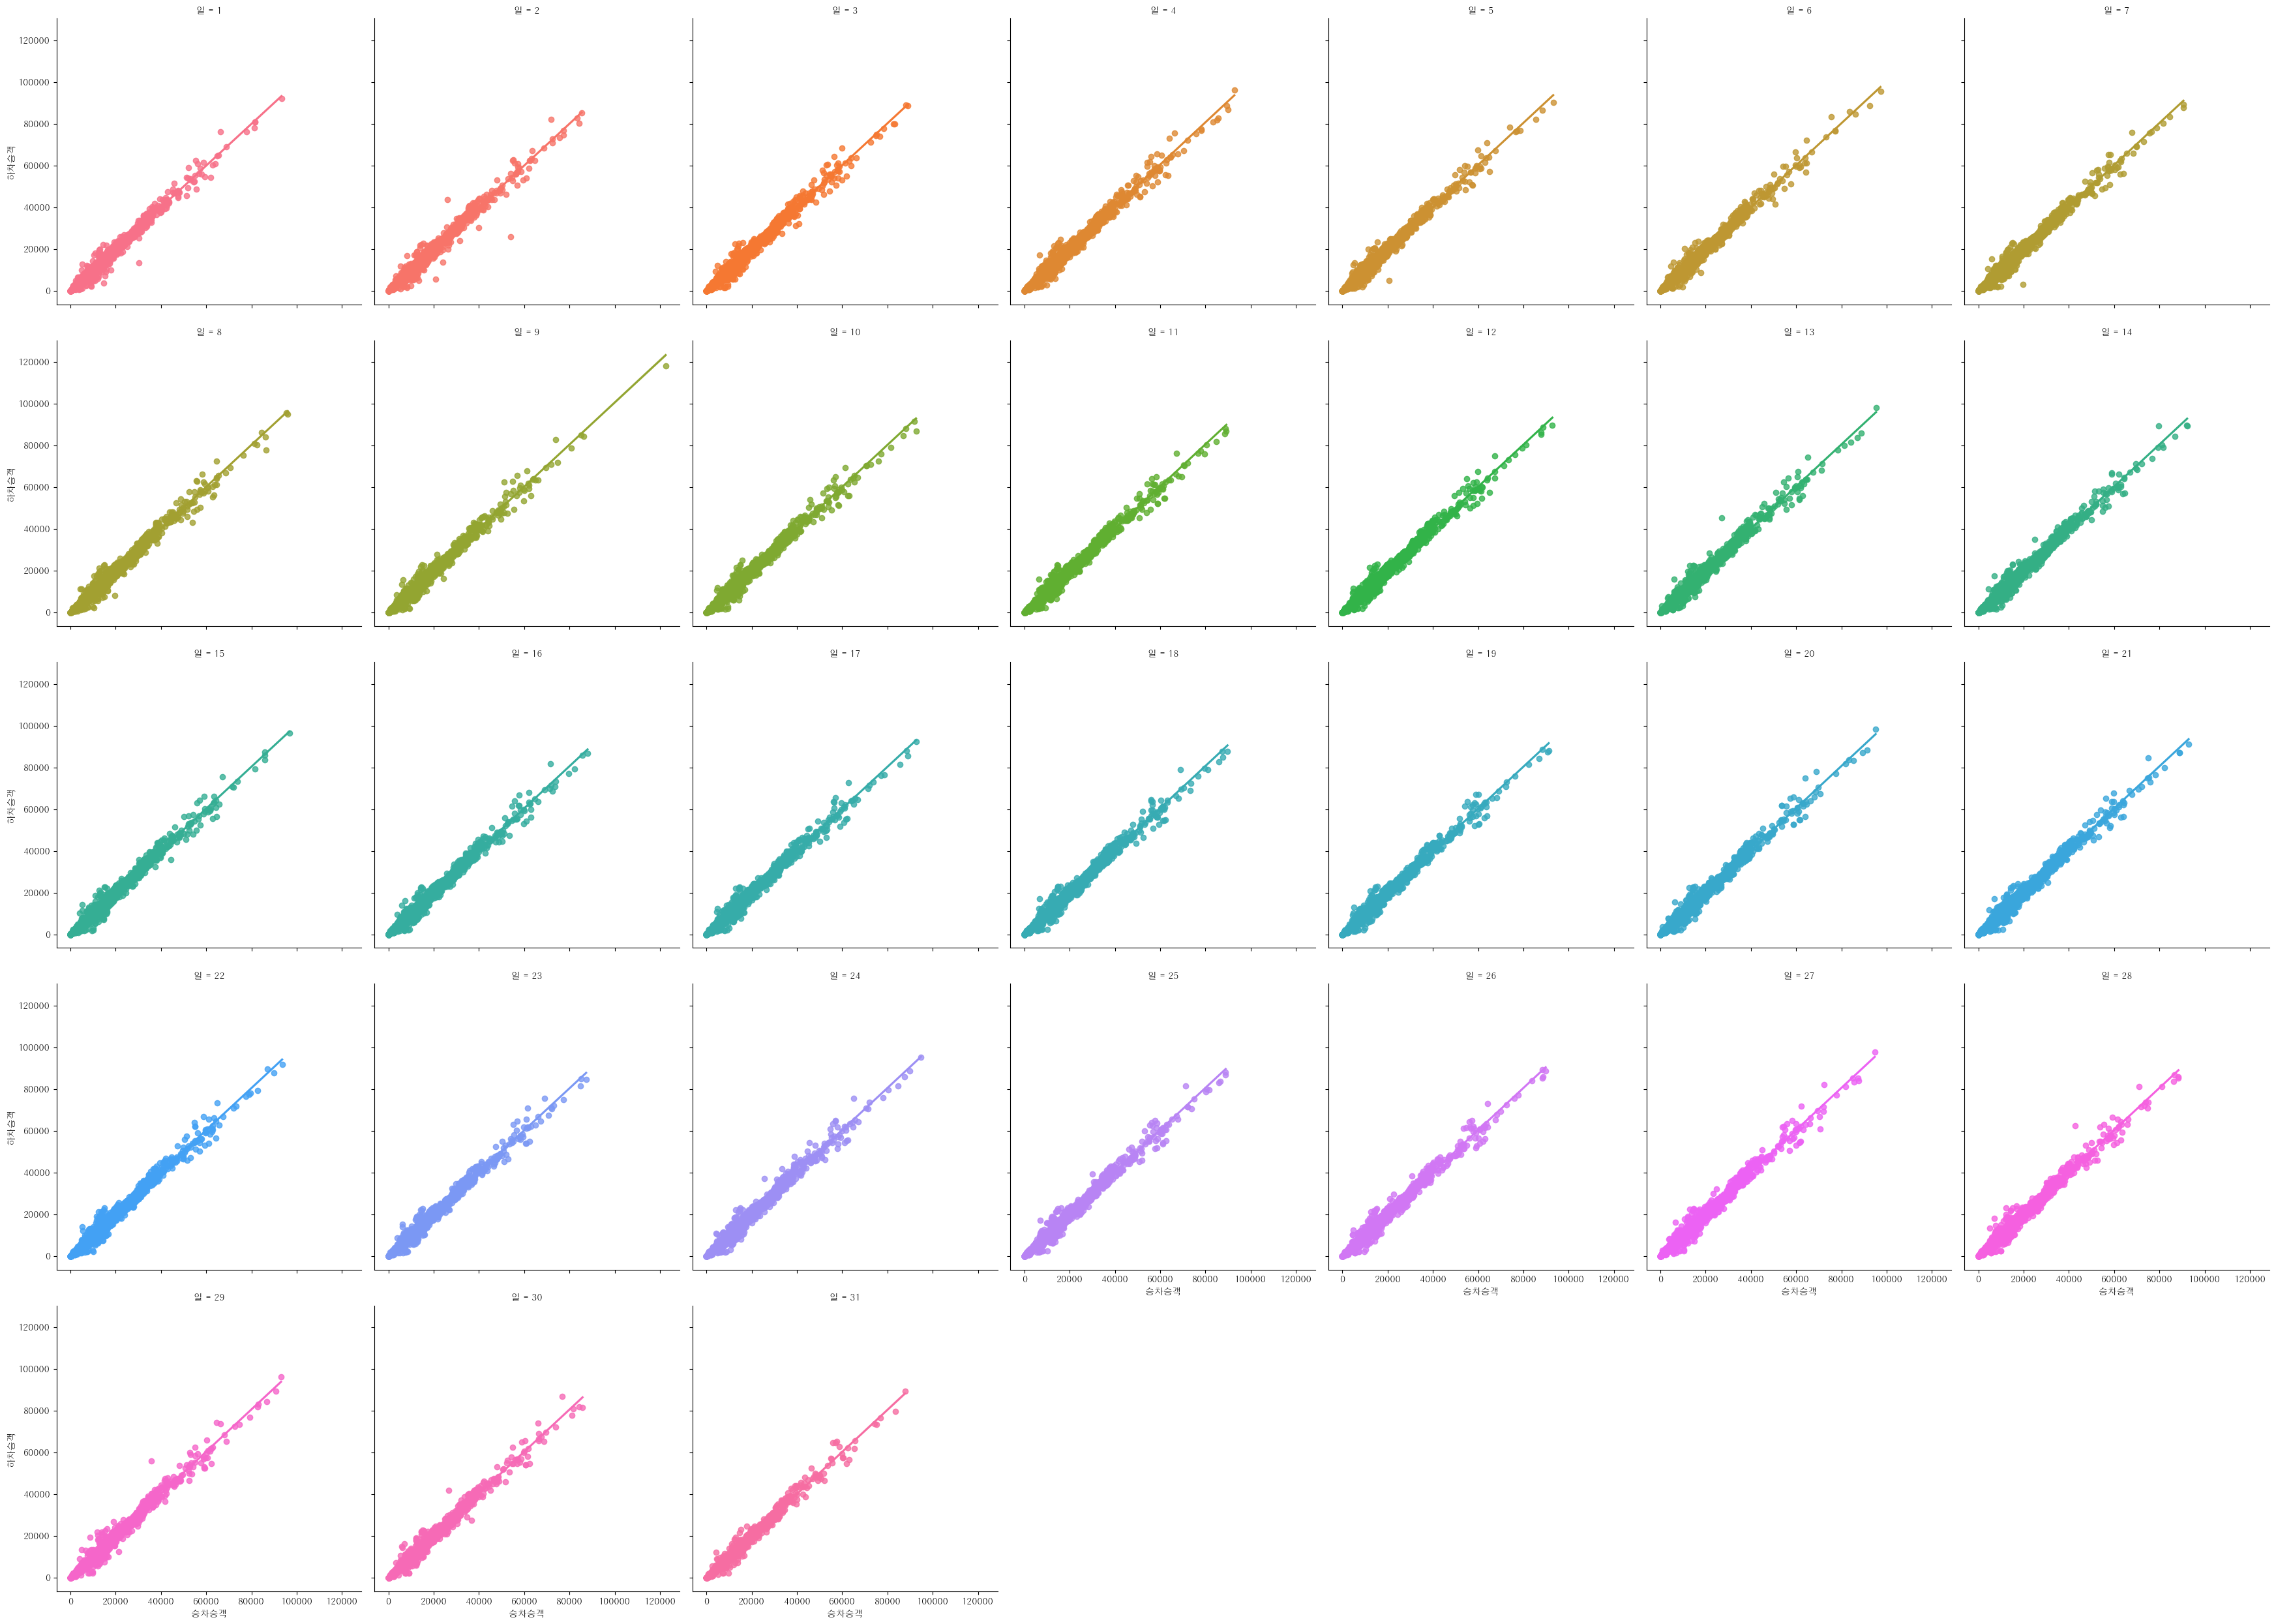

In [77]:
sns.lmplot(data=df9, x="승차승객", y="하차승객", hue="일", col="일", col_wrap=7)

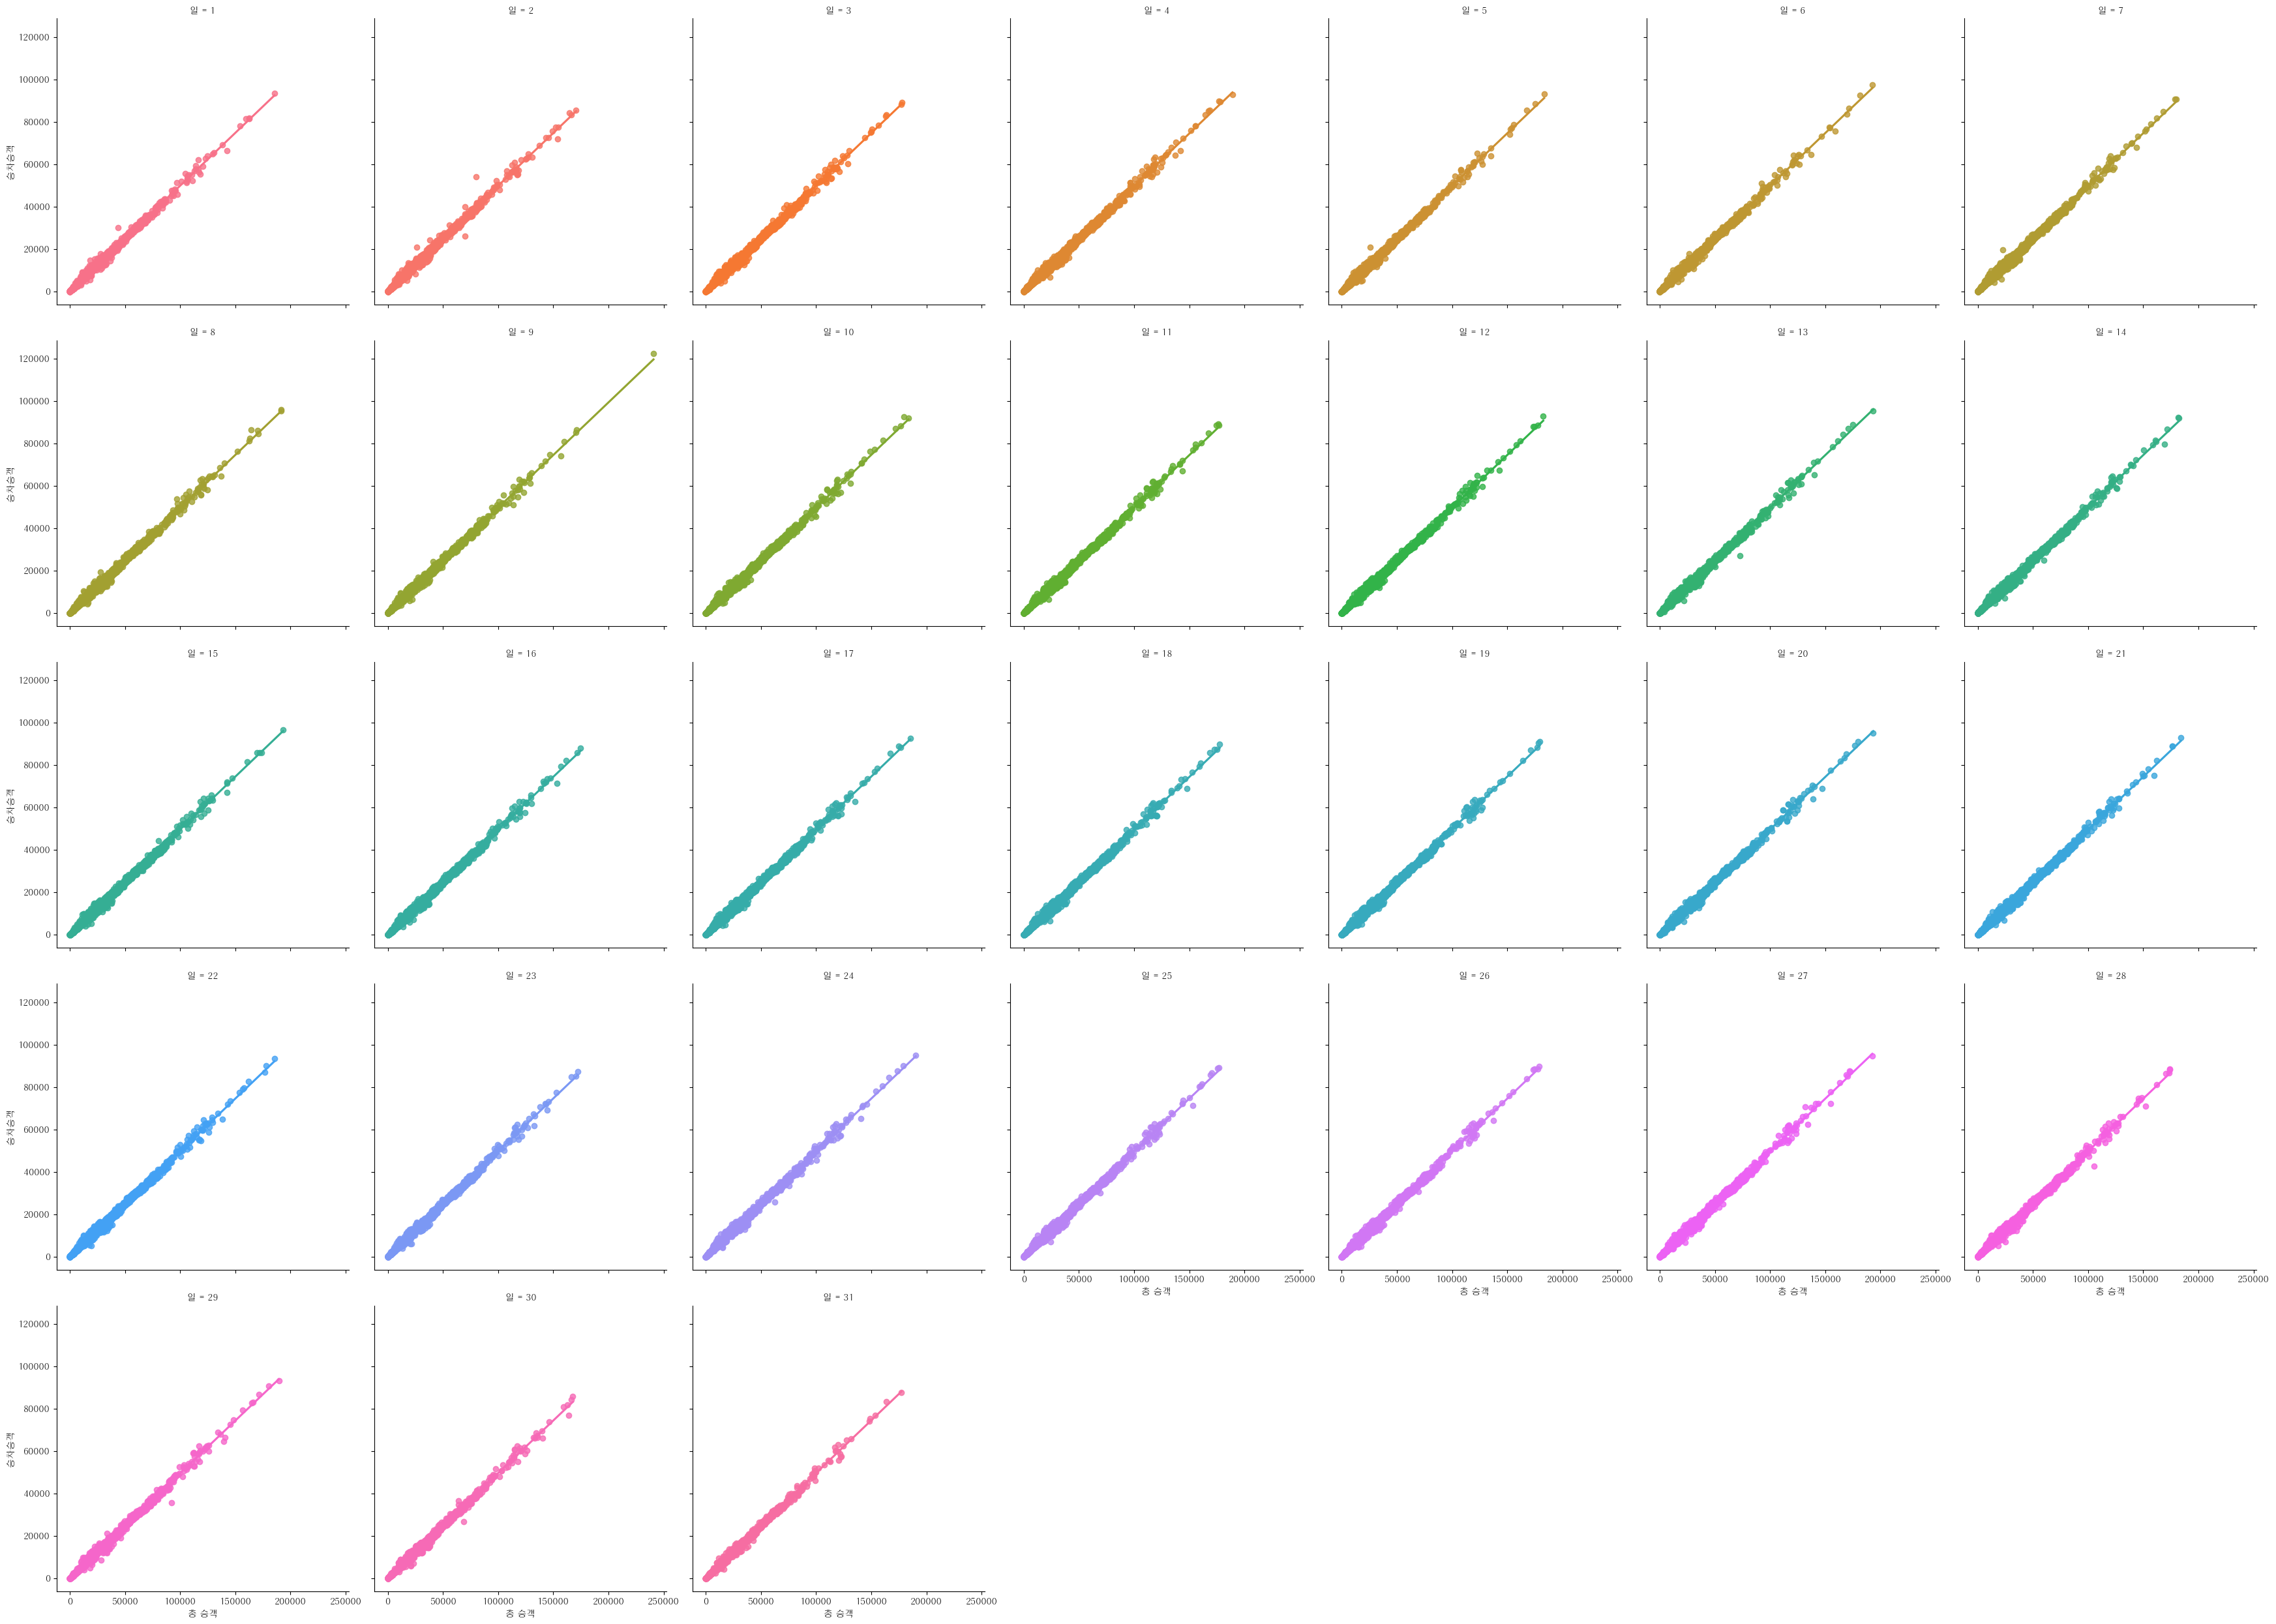

In [78]:
sns.lmplot(data=df9, x="총 승객", y="승차승객", hue="일", col="일", col_wrap=7)

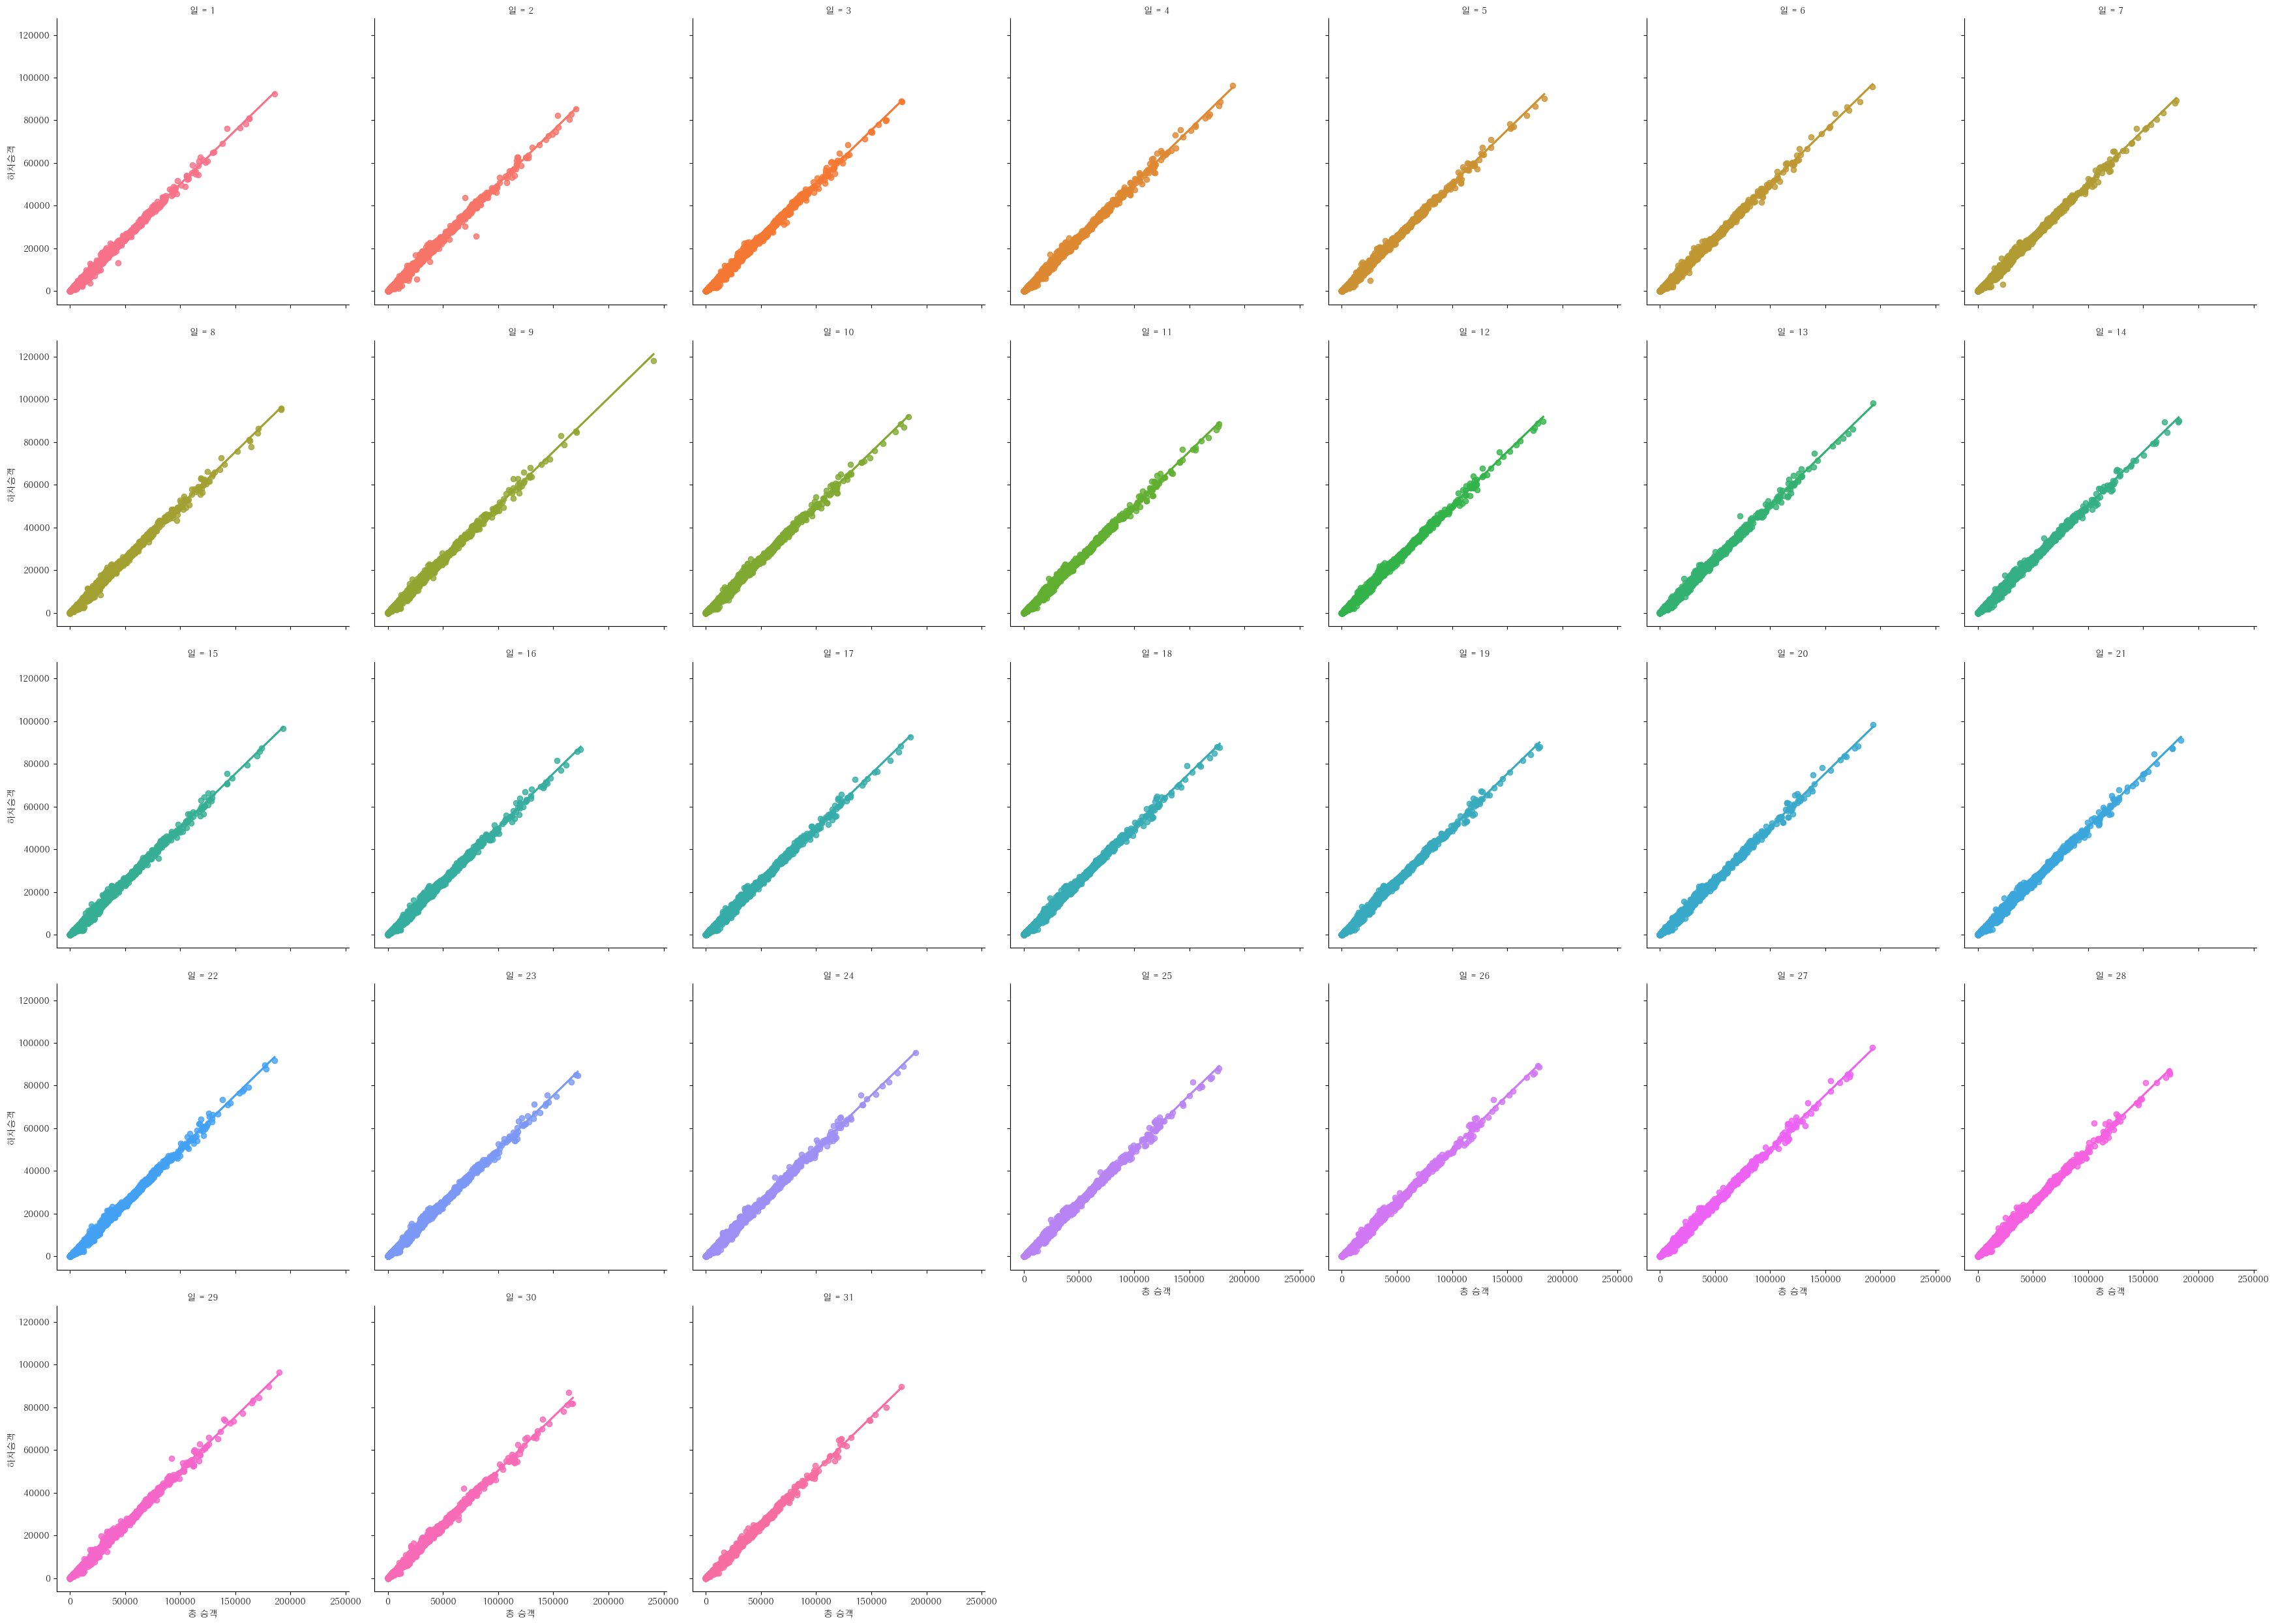

In [79]:
sns.lmplot(data=df9, x="총 승객", y="하차승객", hue="일", col="일", col_wrap=7)

### 그 외 데이터 및 그래프

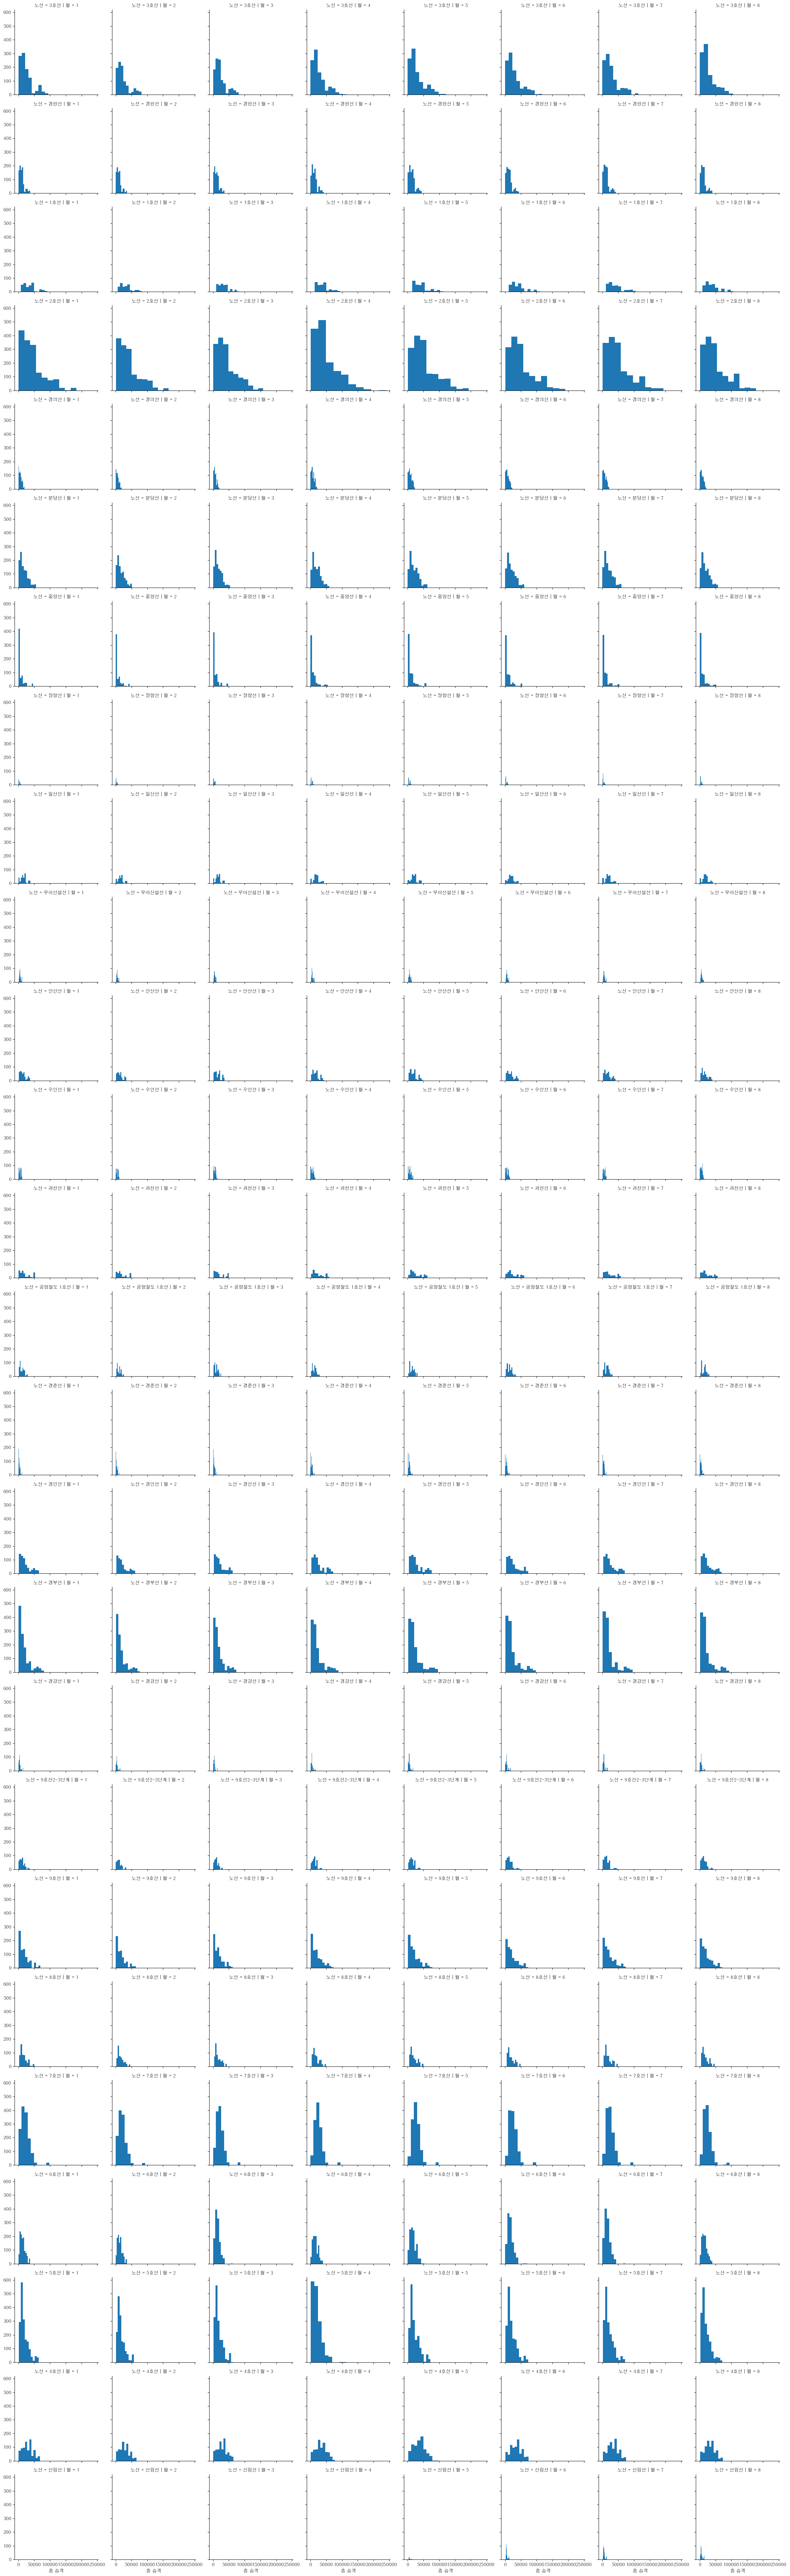

In [87]:
g=sns.FacetGrid(df9, row="노선", col="월")
g.map(plt.hist, "총 승객")

In [88]:
df9a=df9.pivot_table(index="월", columns="일", values="총 승객")
df9a

일,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
월,,,,,,,,,,,,,,,,,,,,,
1,8708.150502,9959.969849,20466.931667,21054.423588,21312.758794,21619.835294,22263.659396,15005.826087,10815.260504,21294.545000,...,15589.519263,11173.103506,21675.934891,21924.726510,22279.633166,21898.500000,21655.144295,12716.855705,9306.801012,7058.649916
2,6320.280201,8690.050336,19387.031933,20482.526846,13055.951342,9485.473064,20492.445561,20808.520134,20895.409699,20889.529313,...,20057.842017,19711.450166,19935.556856,20758.750419,13672.129412,10432.176768,19351.911223,NaN,NaN,NaN
3,10881.367622,20592.598662,20632.030151,20817.254181,13939.752941,9898.694491,20096.624791,20805.188648,11399.470588,20140.393635,...,20502.416526,20378.281145,20712.626263,21279.346218,13722.901173,11065.418487,20653.899160,21083.810084,20789.288364,21094.954698
4,22288.432660,16012.670588,11764.310287,21427.033557,21895.868465,22096.681208,22159.234114,23316.082215,17664.438861,13434.338926,...,23421.159396,17182.162752,12544.920742,22719.783557,23521.495784,24053.399329,24204.937919,25134.826599,18763.091062,NaN
5,13807.072391,23800.978188,24646.728956,26279.747049,15668.218487,23498.487395,16920.370184,12632.804714,24028.744966,24782.580808,...,14108.084175,23955.217755,24742.427852,25112.075503,25216.354622,26100.085714,18953.044554,13617.168317,23551.215232,25160.869421
6,14661.737190,24213.991736,24662.706076,17419.820428,13109.793729,12324.257851,24066.548600,24298.576606,24180.690909,25090.735974,...,24399.306931,23072.198675,24879.301980,18309.654605,12710.811570,22734.400000,23020.425743,23114.638614,22468.660066,NaN
7,24714.361842,17919.462046,12747.455446,23199.364086,23687.179572,23840.151316,23276.835526,24505.379538,17652.909241,12894.893864,...,23881.074135,16503.314050,12073.147351,22390.739274,22663.458746,22617.478618,22679.289256,23066.587459,15352.469421,11079.755372
8,20584.279339,20823.613223,21020.003306,21988.680992,22289.199341,15283.024752,11524.180464,20481.743802,19326.966997,22039.117745,...,22056.963756,22677.808896,23012.273026,23008.693069,24304.794069,18093.158155,13387.034711,22760.445724,22466.566722,23849.645215
